In [301]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
torch.manual_seed(2)

In [302]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)



In [303]:
import util
X, Y = util.load_dataset('triangle_train.csv', add_intercept=False)
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# Set the mean and standard deviation for the Gaussian noise
mean = 0
std_dev = 0.35

# Generate the Gaussian noise
noise = np.random.normal(mean, std_dev, X.shape)
# X = X + noise
X = torch.from_numpy(X).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
Y = torch.from_numpy(Y).type(torch.FloatTensor)
Y_test = torch.from_numpy(Y_test).type(torch.FloatTensor)
print(X)

tensor([[1.7687, 1.3407],
        [3.9860, 2.8100],
        [1.8717, 1.4474],
        [1.5922, 1.4102],
        [1.3151, 3.4067],
        [1.8314, 3.8942],
        [2.6514, 3.7404],
        [0.0355, 3.7183],
        [1.5372, 0.7944],
        [0.7194, 2.0647],
        [0.9864, 1.3876],
        [2.6626, 2.8384],
        [3.8000, 0.7465],
        [2.9637, 3.1213],
        [1.0380, 1.2769],
        [1.3259, 0.2825],
        [3.7049, 0.9174],
        [0.9566, 3.6837],
        [1.8797, 2.5047],
        [3.1683, 3.1272],
        [0.2081, 1.0333],
        [0.7173, 1.0144],
        [2.6247, 2.5373],
        [2.7877, 3.8353],
        [2.9842, 3.8024],
        [2.6145, 3.6815],
        [0.0319, 0.0444],
        [1.3808, 0.2324],
        [1.4996, 3.9423],
        [2.2997, 3.7656],
        [3.1005, 2.1695],
        [0.2238, 0.1219],
        [0.5329, 3.7763],
        [2.6548, 2.4436],
        [0.6359, 3.9935],
        [3.1035, 1.7700],
        [1.9923, 1.2260],
        [0.1270, 0.1046],
        [3.6

In [81]:
class Triangle(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(Triangle, self).__init__()
        self.lin1 = nn.Linear(input_dim, 3)
        self.lin11 = nn.Linear(3, 3)
        self.lin2 = nn.Linear(3, output_dim)
        
    def lin1ac(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        return x
    
    def lin11ac(self, x):
        x = self.lin11(x)
        x = torch.sigmoid(x)
        return x
    
    def lin2ac(self, x):
        x = self.lin2(x)
#         print('yhat',x)
        x = torch.sigmoid(x)
        x = x.reshape(-1)
        return x
    
    def forward(self, x):
#         print('x', x)
        x = self.lin1ac(x) 
        x = self.lin11ac(x)
#         print('h', x.size(), x)
        x = self.lin2ac(x)  
#         x = F.relu(x)
        return x

In [82]:
model = Triangle()


In [83]:
#Init with optimal weights
def weights_init_optimal(model):
    lin1_weights = torch.Tensor([[-1,0],[0,-1],[1,1]])
    lin1_bias = torch.Tensor([0.5, 0.5, -4])
    lin2_weights = torch.Tensor([1 ,1 ,1])
    lin2_bias = torch.Tensor([0])
    with torch.no_grad():
        model.lin1.weight.copy_(lin1_weights)
        model.lin1.bias.copy_(lin1_bias)
        model.lin2.weight.copy_(lin2_weights)
        model.lin2.bias.copy_(lin2_bias)

In [304]:
# weights_init(model)
loss_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
# weights_init_optimal(model)
weights_init(model)

NameError: name 'model' is not defined

In [85]:
x1 = torch.Tensor([0.2,2])
pred = model(x1)
print(pred)

tensor([0.2560], grad_fn=<ViewBackward0>)


In [86]:
y_hat = model(X_test)
print(y_hat)
print (Y_test.size())
loss = loss_func.forward(y_hat, Y_test)
print(loss)

tensor([0.2246, 0.2344, 0.2196, 0.2195, 0.2547, 0.2523, 0.2204, 0.2196, 0.2569,
        0.2210, 0.2311, 0.2434, 0.2218, 0.2201, 0.2556, 0.2200, 0.2257, 0.2303,
        0.2250, 0.2245, 0.2454, 0.2231, 0.2331, 0.2249, 0.2205, 0.2406, 0.2203,
        0.2221, 0.2207, 0.2222, 0.2293, 0.2301, 0.2203, 0.2205, 0.2199, 0.2562,
        0.2586, 0.2230, 0.2193, 0.2274, 0.2203, 0.2194, 0.2236, 0.2393, 0.2250,
        0.2207, 0.2273, 0.2253, 0.2404, 0.2203, 0.2352, 0.2205, 0.2395, 0.2219,
        0.2545, 0.2247, 0.2262, 0.2330, 0.2206, 0.2558, 0.2194, 0.2214, 0.2544,
        0.2225, 0.2318, 0.2286, 0.2332, 0.2201, 0.2430, 0.2270, 0.2589, 0.2318,
        0.2397, 0.2452, 0.2264, 0.2195, 0.2324, 0.2204, 0.2330, 0.2220, 0.2471,
        0.2567, 0.2269, 0.2210, 0.2316, 0.2235, 0.2569, 0.2273, 0.2411, 0.2195],
       grad_fn=<ViewBackward0>)
torch.Size([90])
tensor(1.1503, grad_fn=<BinaryCrossEntropyBackward0>)


In [87]:
# epochs = 2000
# for i in range(epochs):
#     optimizer.zero_grad()
#     y_hat = model(X)
# #         print(y_hat)
#     loss = loss_func.forward(y_hat, Y)
#     loss.backward()
#     optimizer.step()

# #     if i % 500 == 0:
#     print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

In [341]:
def plotloss (num_epochs, train_losses, test_losses, save_path=None):
    # Plotting the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_epochs), train_losses, label='Train Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(num_epochs), test_losses, label='Test Loss', color='red', linestyle='--', marker='x')

    # Adding labels and title
    plt.title('Training and Test Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    if save_path is not None:
        plt.savefig(save_path)


In [344]:
def plot_codebook_util (num_epochs, codebook_util, code1, save_path=None):
    # Plotting the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_epochs), codebook_util, label='Codebook 1 utilization', color='blue', linestyle='-', marker='o')
    plt.plot(range(num_epochs), code1, label='Codebook 2 utilization', color='violet', linestyle='-', marker='o')

    # Adding labels and title
    plt.title('Codebook utilization over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Utilization')
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    if save_path is not None:
        plt.savefig(save_path)

Epoch: 0, Loss: 0.5835400223731995, 
Epoch: 1, Loss: 0.610016405582428, 
Epoch: 2, Loss: 0.5910577774047852, 
Epoch: 3, Loss: 0.5867846012115479, 
Epoch: 4, Loss: 0.5870770215988159, 
Epoch: 5, Loss: 0.5871405005455017, 
Epoch: 6, Loss: 0.5868098735809326, 
Epoch: 7, Loss: 0.5864725112915039, 
Epoch: 8, Loss: 0.5861750841140747, 
Epoch: 9, Loss: 0.5858861207962036, 
Epoch: 10, Loss: 0.5855969190597534, 
Epoch: 11, Loss: 0.5853080153465271, 
Epoch: 12, Loss: 0.5850191116333008, 
Epoch: 13, Loss: 0.5847291946411133, 
Epoch: 14, Loss: 0.5844368934631348, 
Epoch: 15, Loss: 0.5841413140296936, 
Epoch: 16, Loss: 0.5838412642478943, 
Epoch: 17, Loss: 0.58353590965271, 
Epoch: 18, Loss: 0.5832239985466003, 
Epoch: 19, Loss: 0.582904577255249, 
Epoch: 20, Loss: 0.5825764536857605, 
Epoch: 21, Loss: 0.582238495349884, 
Epoch: 22, Loss: 0.5818893313407898, 
Epoch: 23, Loss: 0.5815278887748718, 
Epoch: 24, Loss: 0.5811526775360107, 
Epoch: 25, Loss: 0.5807623267173767, 
Epoch: 26, Loss: 0.58035516

Epoch: 219, Loss: 0.01649610511958599, 
Epoch: 220, Loss: 0.01630639098584652, 
Epoch: 221, Loss: 0.016120560467243195, 
Epoch: 222, Loss: 0.015938449651002884, 
Epoch: 223, Loss: 0.015760015696287155, 
Epoch: 224, Loss: 0.01558510959148407, 
Epoch: 225, Loss: 0.01541364286094904, 
Epoch: 226, Loss: 0.015245550312101841, 
Epoch: 227, Loss: 0.015080691315233707, 
Epoch: 228, Loss: 0.014919005334377289, 
Epoch: 229, Loss: 0.014760399237275124, 
Epoch: 230, Loss: 0.014604791067540646, 
Epoch: 231, Loss: 0.01445211935788393, 
Epoch: 232, Loss: 0.014302288182079792, 
Epoch: 233, Loss: 0.014155225828289986, 
Epoch: 234, Loss: 0.014010842889547348, 
Epoch: 235, Loss: 0.013869107700884342, 
Epoch: 236, Loss: 0.0137299420312047, 
Epoch: 237, Loss: 0.013593249954283237, 
Epoch: 238, Loss: 0.013459001667797565, 
Epoch: 239, Loss: 0.013327127322554588, 
Epoch: 240, Loss: 0.013197554275393486, 
Epoch: 241, Loss: 0.013070238754153252, 
Epoch: 242, Loss: 0.012945140711963177, 
Epoch: 243, Loss: 0.012

Epoch: 425, Loss: 0.004395280499011278, 
Epoch: 426, Loss: 0.004378433804959059, 
Epoch: 427, Loss: 0.004361699800938368, 
Epoch: 428, Loss: 0.004345091059803963, 
Epoch: 429, Loss: 0.004328587092459202, 
Epoch: 430, Loss: 0.004312213510274887, 
Epoch: 431, Loss: 0.004295945167541504, 
Epoch: 432, Loss: 0.00427979277446866, 
Epoch: 433, Loss: 0.004263762850314379, 
Epoch: 434, Loss: 0.0042478470131754875, 
Epoch: 435, Loss: 0.0042320238426327705, 
Epoch: 436, Loss: 0.004216312896460295, 
Epoch: 437, Loss: 0.004200724884867668, 
Epoch: 438, Loss: 0.004185244906693697, 
Epoch: 439, Loss: 0.004169864114373922, 
Epoch: 440, Loss: 0.0041545904241502285, 
Epoch: 441, Loss: 0.004139413125813007, 
Epoch: 442, Loss: 0.004124362021684647, 
Epoch: 443, Loss: 0.004109399858862162, 
Epoch: 444, Loss: 0.004094547592103481, 
Epoch: 445, Loss: 0.004079790320247412, 
Epoch: 446, Loss: 0.004065130837261677, 
Epoch: 447, Loss: 0.004050570074468851, 
Epoch: 448, Loss: 0.004036111291497946, 
Epoch: 449, Lo

Epoch: 632, Loss: 0.002405119827017188, 
Epoch: 633, Loss: 0.0023997200187295675, 
Epoch: 634, Loss: 0.00239433441311121, 
Epoch: 635, Loss: 0.002388973021879792, 
Epoch: 636, Loss: 0.0023836414329707623, 
Epoch: 637, Loss: 0.002378331497311592, 
Epoch: 638, Loss: 0.002373039722442627, 
Epoch: 639, Loss: 0.002367771929129958, 
Epoch: 640, Loss: 0.0023625188041478395, 
Epoch: 641, Loss: 0.002357285236939788, 
Epoch: 642, Loss: 0.0023520903196185827, 
Epoch: 643, Loss: 0.002346903085708618, 
Epoch: 644, Loss: 0.0023417549673467875, 
Epoch: 645, Loss: 0.002336622914299369, 
Epoch: 646, Loss: 0.002331499243155122, 
Epoch: 647, Loss: 0.0023264118935912848, 
Epoch: 648, Loss: 0.002321327570825815, 
Epoch: 649, Loss: 0.0023162811994552612, 
Epoch: 650, Loss: 0.002311244374141097, 
Epoch: 651, Loss: 0.0023062273394316435, 
Epoch: 652, Loss: 0.0023012510500848293, 
Epoch: 653, Loss: 0.002296287100762129, 
Epoch: 654, Loss: 0.002291328739374876, 
Epoch: 655, Loss: 0.0022863964550197124, 
Epoch: 

Epoch: 846, Loss: 0.0016123218229040504, 
Epoch: 847, Loss: 0.0016097932821139693, 
Epoch: 848, Loss: 0.0016072818543761969, 
Epoch: 849, Loss: 0.0016047782264649868, 
Epoch: 850, Loss: 0.001602279138751328, 
Epoch: 851, Loss: 0.0015997891314327717, 
Epoch: 852, Loss: 0.0015973089030012488, 
Epoch: 853, Loss: 0.001594826579093933, 
Epoch: 854, Loss: 0.0015923557803034782, 
Epoch: 855, Loss: 0.0015898979036137462, 
Epoch: 856, Loss: 0.001587436767295003, 
Epoch: 857, Loss: 0.0015849799383431673, 
Epoch: 858, Loss: 0.0015825387090444565, 
Epoch: 859, Loss: 0.0015801055124029517, 
Epoch: 860, Loss: 0.0015776839572936296, 
Epoch: 861, Loss: 0.0015752605395391583, 
Epoch: 862, Loss: 0.0015728489961475134, 
Epoch: 863, Loss: 0.0015704454854130745, 
Epoch: 864, Loss: 0.001568048377521336, 
Epoch: 865, Loss: 0.0015656511532142758, 
Epoch: 866, Loss: 0.0015632553258910775, 
Epoch: 867, Loss: 0.0015608806861564517, 
Epoch: 868, Loss: 0.0015585154760628939, 
Epoch: 869, Loss: 0.001556151430122554

Epoch: 1061, Loss: 0.0012021679431200027, 
Epoch: 1062, Loss: 0.0012007355690002441, 
Epoch: 1063, Loss: 0.0011993002844974399, 
Epoch: 1064, Loss: 0.0011978630209341645, 
Epoch: 1065, Loss: 0.0011964408913627267, 
Epoch: 1066, Loss: 0.0011950180632993579, 
Epoch: 1067, Loss: 0.0011935963993892074, 
Epoch: 1068, Loss: 0.001192184747196734, 
Epoch: 1069, Loss: 0.0011907776352018118, 
Epoch: 1070, Loss: 0.0011893674964085221, 
Epoch: 1071, Loss: 0.0011879594530910254, 
Epoch: 1072, Loss: 0.0011865503620356321, 
Epoch: 1073, Loss: 0.0011851447634398937, 
Epoch: 1074, Loss: 0.001183731947094202, 
Epoch: 1075, Loss: 0.0011823420645669103, 
Epoch: 1076, Loss: 0.0011809575371444225, 
Epoch: 1077, Loss: 0.001179576269350946, 
Epoch: 1078, Loss: 0.0011781947687268257, 
Epoch: 1079, Loss: 0.0011767984833568335, 
Epoch: 1080, Loss: 0.0011754160514101386, 
Epoch: 1081, Loss: 0.0011740423506125808, 
Epoch: 1082, Loss: 0.001172672025859356, 
Epoch: 1083, Loss: 0.0011712982086464763, 
Epoch: 1084, Lo

Epoch: 1272, Loss: 0.0009580948390066624, 
Epoch: 1273, Loss: 0.0009571698028594255, 
Epoch: 1274, Loss: 0.0009562434279359877, 
Epoch: 1275, Loss: 0.0009553162381052971, 
Epoch: 1276, Loss: 0.0009543907945044339, 
Epoch: 1277, Loss: 0.0009534619748592377, 
Epoch: 1278, Loss: 0.0009525434579700232, 
Epoch: 1279, Loss: 0.0009516254649497569, 
Epoch: 1280, Loss: 0.0009507068316452205, 
Epoch: 1281, Loss: 0.0009497945429757237, 
Epoch: 1282, Loss: 0.0009488784708082676, 
Epoch: 1283, Loss: 0.0009479713044129312, 
Epoch: 1284, Loss: 0.0009470679797232151, 
Epoch: 1285, Loss: 0.0009461568552069366, 
Epoch: 1286, Loss: 0.0009452506783418357, 
Epoch: 1287, Loss: 0.0009443496819585562, 
Epoch: 1288, Loss: 0.0009434377425350249, 
Epoch: 1289, Loss: 0.0009425433236174285, 
Epoch: 1290, Loss: 0.0009416471002623439, 
Epoch: 1291, Loss: 0.0009407420875504613, 
Epoch: 1292, Loss: 0.0009398487745784223, 
Epoch: 1293, Loss: 0.0009389574406668544, 
Epoch: 1294, Loss: 0.0009380594710819423, 
Epoch: 1295

Epoch: 1481, Loss: 0.0007956765475682914, 
Epoch: 1482, Loss: 0.0007950159488245845, 
Epoch: 1483, Loss: 0.0007943733944557607, 
Epoch: 1484, Loss: 0.0007937274058349431, 
Epoch: 1485, Loss: 0.0007930856663733721, 
Epoch: 1486, Loss: 0.0007924376404844224, 
Epoch: 1487, Loss: 0.0007917932234704494, 
Epoch: 1488, Loss: 0.0007911516586318612, 
Epoch: 1489, Loss: 0.0007905126549303532, 
Epoch: 1490, Loss: 0.0007898720796220005, 
Epoch: 1491, Loss: 0.000789235346019268, 
Epoch: 1492, Loss: 0.0007885962841100991, 
Epoch: 1493, Loss: 0.0007879612967371941, 
Epoch: 1494, Loss: 0.0007873257272876799, 
Epoch: 1495, Loss: 0.0007866836967878044, 
Epoch: 1496, Loss: 0.0007860495243221521, 
Epoch: 1497, Loss: 0.0007854215218685567, 
Epoch: 1498, Loss: 0.0007847898523323238, 
Epoch: 1499, Loss: 0.0007841577171348035, 
Epoch: 1500, Loss: 0.0007835253491066396, 
Epoch: 1501, Loss: 0.000782891467679292, 
Epoch: 1502, Loss: 0.0007822552579455078, 
Epoch: 1503, Loss: 0.0007816317374818027, 
Epoch: 1504, 

Epoch: 1693, Loss: 0.0006777550443075597, 
Epoch: 1694, Loss: 0.0006772794877178967, 
Epoch: 1695, Loss: 0.0006767961313016713, 
Epoch: 1696, Loss: 0.0006763193523511291, 
Epoch: 1697, Loss: 0.0006758543895557523, 
Epoch: 1698, Loss: 0.0006753762718290091, 
Epoch: 1699, Loss: 0.0006749036256223917, 
Epoch: 1700, Loss: 0.0006744269048795104, 
Epoch: 1701, Loss: 0.000673959671985358, 
Epoch: 1702, Loss: 0.0006734924390912056, 
Epoch: 1703, Loss: 0.0006730205495841801, 
Epoch: 1704, Loss: 0.0006725552375428379, 
Epoch: 1705, Loss: 0.0006720816600136459, 
Epoch: 1706, Loss: 0.0006716146599501371, 
Epoch: 1707, Loss: 0.0006711494643241167, 
Epoch: 1708, Loss: 0.0006706914864480495, 
Epoch: 1709, Loss: 0.0006702134851366282, 
Epoch: 1710, Loss: 0.0006697578355669975, 
Epoch: 1711, Loss: 0.0006692853639833629, 
Epoch: 1712, Loss: 0.0006688206340186298, 
Epoch: 1713, Loss: 0.0006683551473543048, 
Epoch: 1714, Loss: 0.0006678919889964163, 
Epoch: 1715, Loss: 0.0006674305768683553, 
Epoch: 1716,

Epoch: 1884, Loss: 0.0005972879007458687, 
Epoch: 1885, Loss: 0.0005969193880446255, 
Epoch: 1886, Loss: 0.0005965489544905722, 
Epoch: 1887, Loss: 0.0005961733986623585, 
Epoch: 1888, Loss: 0.000595803780015558, 
Epoch: 1889, Loss: 0.0005954249063506722, 
Epoch: 1890, Loss: 0.0005950565100647509, 
Epoch: 1891, Loss: 0.0005946899182163179, 
Epoch: 1892, Loss: 0.0005943205906078219, 
Epoch: 1893, Loss: 0.0005939477705396712, 
Epoch: 1894, Loss: 0.0005935779772698879, 
Epoch: 1895, Loss: 0.0005932190688326955, 
Epoch: 1896, Loss: 0.0005928505561314523, 
Epoch: 1897, Loss: 0.0005924803554080427, 
Epoch: 1898, Loss: 0.0005921142874285579, 
Epoch: 1899, Loss: 0.0005917444359511137, 
Epoch: 1900, Loss: 0.0005913797067478299, 
Epoch: 1901, Loss: 0.0005910180625505745, 
Epoch: 1902, Loss: 0.0005906554288230836, 
Epoch: 1903, Loss: 0.0005902895936742425, 
Epoch: 1904, Loss: 0.0005899291136302054, 
Epoch: 1905, Loss: 0.0005895605427213013, 
Epoch: 1906, Loss: 0.000589194823987782, 
Epoch: 1907, 

Epoch: 2096, Loss: 0.000527242838870734, 
Epoch: 2097, Loss: 0.0005269511020742357, 
Epoch: 2098, Loss: 0.000526665011420846, 
Epoch: 2099, Loss: 0.0005263664643280208, 
Epoch: 2100, Loss: 0.0005260705365799367, 
Epoch: 2101, Loss: 0.000525780429597944, 
Epoch: 2102, Loss: 0.0005254892166703939, 
Epoch: 2103, Loss: 0.0005252016708254814, 
Epoch: 2104, Loss: 0.0005249126115813851, 
Epoch: 2105, Loss: 0.000524624134413898, 
Epoch: 2106, Loss: 0.0005243330379016697, 
Epoch: 2107, Loss: 0.0005240372847765684, 
Epoch: 2108, Loss: 0.0005237419973127544, 
Epoch: 2109, Loss: 0.000523457070812583, 
Epoch: 2110, Loss: 0.0005231725517660379, 
Epoch: 2111, Loss: 0.0005228841910138726, 
Epoch: 2112, Loss: 0.0005225992063060403, 
Epoch: 2113, Loss: 0.0005223141051828861, 
Epoch: 2114, Loss: 0.0005220248131081462, 
Epoch: 2115, Loss: 0.0005217454745434225, 
Epoch: 2116, Loss: 0.0005214579286985099, 
Epoch: 2117, Loss: 0.0005211633397266269, 
Epoch: 2118, Loss: 0.0005208777729421854, 
Epoch: 2119, Los

Epoch: 2306, Loss: 0.00047205985174514353, 
Epoch: 2307, Loss: 0.0004718266427516937, 
Epoch: 2308, Loss: 0.0004715992254205048, 
Epoch: 2309, Loss: 0.0004713578673545271, 
Epoch: 2310, Loss: 0.0004711264919023961, 
Epoch: 2311, Loss: 0.0004708889755420387, 
Epoch: 2312, Loss: 0.0004706542531494051, 
Epoch: 2313, Loss: 0.0004704250313807279, 
Epoch: 2314, Loss: 0.00047018189798109233, 
Epoch: 2315, Loss: 0.0004699469718616456, 
Epoch: 2316, Loss: 0.0004697103868238628, 
Epoch: 2317, Loss: 0.0004694827657658607, 
Epoch: 2318, Loss: 0.0004692480724770576, 
Epoch: 2319, Loss: 0.0004690168716479093, 
Epoch: 2320, Loss: 0.00046878226567059755, 
Epoch: 2321, Loss: 0.00046854771790094674, 
Epoch: 2322, Loss: 0.00046831369400024414, 
Epoch: 2323, Loss: 0.00046807940816506743, 
Epoch: 2324, Loss: 0.0004678471595980227, 
Epoch: 2325, Loss: 0.00046760885743424296, 
Epoch: 2326, Loss: 0.0004673779767472297, 
Epoch: 2327, Loss: 0.0004671457863878459, 
Epoch: 2328, Loss: 0.00046691749594174325, 
Epo

Epoch: 2516, Loss: 0.0004270611680112779, 
Epoch: 2517, Loss: 0.00042685907101258636, 
Epoch: 2518, Loss: 0.00042666628723964095, 
Epoch: 2519, Loss: 0.0004264826711732894, 
Epoch: 2520, Loss: 0.0004262847069185227, 
Epoch: 2521, Loss: 0.0004260919231455773, 
Epoch: 2522, Loss: 0.0004259039124008268, 
Epoch: 2523, Loss: 0.0004257079563103616, 
Epoch: 2524, Loss: 0.0004255181411281228, 
Epoch: 2525, Loss: 0.000425322592491284, 
Epoch: 2526, Loss: 0.0004251299542374909, 
Epoch: 2527, Loss: 0.00042494211811572313, 
Epoch: 2528, Loss: 0.00042474502697587013, 
Epoch: 2529, Loss: 0.0004245482268743217, 
Epoch: 2530, Loss: 0.00042436111834831536, 
Epoch: 2531, Loss: 0.00042417398071847856, 
Epoch: 2532, Loss: 0.0004239860863890499, 
Epoch: 2533, Loss: 0.00042379050864838064, 
Epoch: 2534, Loss: 0.00042359481449238956, 
Epoch: 2535, Loss: 0.000423407182097435, 
Epoch: 2536, Loss: 0.0004232123028486967, 
Epoch: 2537, Loss: 0.0004230277263559401, 
Epoch: 2538, Loss: 0.00042283671791665256, 
Epoc

Epoch: 2725, Loss: 0.00038990387110970914, 
Epoch: 2726, Loss: 0.0003897435963153839, 
Epoch: 2727, Loss: 0.00038958105142228305, 
Epoch: 2728, Loss: 0.0003894175461027771, 
Epoch: 2729, Loss: 0.0003892588138114661, 
Epoch: 2730, Loss: 0.00038909405702725053, 
Epoch: 2731, Loss: 0.0003889291547238827, 
Epoch: 2732, Loss: 0.00038876678445376456, 
Epoch: 2733, Loss: 0.0003886100312229246, 
Epoch: 2734, Loss: 0.00038844769005663693, 
Epoch: 2735, Loss: 0.0003882856690324843, 
Epoch: 2736, Loss: 0.00038811349077150226, 
Epoch: 2737, Loss: 0.0003879535652231425, 
Epoch: 2738, Loss: 0.00038779841270297766, 
Epoch: 2739, Loss: 0.000387633393984288, 
Epoch: 2740, Loss: 0.00038747579674236476, 
Epoch: 2741, Loss: 0.0003873138048220426, 
Epoch: 2742, Loss: 0.00038715326809324324, 
Epoch: 2743, Loss: 0.0003869876964017749, 
Epoch: 2744, Loss: 0.00038682972081005573, 
Epoch: 2745, Loss: 0.0003866717161145061, 
Epoch: 2746, Loss: 0.00038651228533126414, 
Epoch: 2747, Loss: 0.0003863451420329511, 
E

Epoch: 2937, Loss: 0.0003581237979233265, 
Epoch: 2938, Loss: 0.00035798337194137275, 
Epoch: 2939, Loss: 0.00035784885403700173, 
Epoch: 2940, Loss: 0.0003577148891054094, 
Epoch: 2941, Loss: 0.00035758010926656425, 
Epoch: 2942, Loss: 0.0003574371221475303, 
Epoch: 2943, Loss: 0.00035729914088733494, 
Epoch: 2944, Loss: 0.00035715915146283805, 
Epoch: 2945, Loss: 0.00035702247987501323, 
Epoch: 2946, Loss: 0.00035688272328116, 
Epoch: 2947, Loss: 0.00035674849641509354, 
Epoch: 2948, Loss: 0.0003566099039744586, 
Epoch: 2949, Loss: 0.0003564733488019556, 
Epoch: 2950, Loss: 0.00035634488449431956, 
Epoch: 2951, Loss: 0.0003562042838893831, 
Epoch: 2952, Loss: 0.0003560710174497217, 
Epoch: 2953, Loss: 0.0003559307078830898, 
Epoch: 2954, Loss: 0.00035580023541115224, 
Epoch: 2955, Loss: 0.00035566490259952843, 
Epoch: 2956, Loss: 0.00035552826011553407, 
Epoch: 2957, Loss: 0.0003553948481567204, 
Epoch: 2958, Loss: 0.0003552583802957088, 
Epoch: 2959, Loss: 0.00035511940950527787, 
E

Epoch: 3145, Loss: 0.0003315195790491998, 
Epoch: 3146, Loss: 0.00033140479354187846, 
Epoch: 3147, Loss: 0.0003312865737825632, 
Epoch: 3148, Loss: 0.0003311671025585383, 
Epoch: 3149, Loss: 0.00033105103648267686, 
Epoch: 3150, Loss: 0.00033093587262555957, 
Epoch: 3151, Loss: 0.0003308132290840149, 
Epoch: 3152, Loss: 0.00033069669734686613, 
Epoch: 3153, Loss: 0.00033057539258152246, 
Epoch: 3154, Loss: 0.00033045595046132803, 
Epoch: 3155, Loss: 0.00033033720683306456, 
Epoch: 3156, Loss: 0.00033021499984897673, 
Epoch: 3157, Loss: 0.0003300968965049833, 
Epoch: 3158, Loss: 0.00032998030656017363, 
Epoch: 3159, Loss: 0.0003298668307252228, 
Epoch: 3160, Loss: 0.0003297492803540081, 
Epoch: 3161, Loss: 0.0003296314098406583, 
Epoch: 3162, Loss: 0.000329511211020872, 
Epoch: 3163, Loss: 0.0003293942427262664, 
Epoch: 3164, Loss: 0.0003292739565949887, 
Epoch: 3165, Loss: 0.0003291617031209171, 
Epoch: 3166, Loss: 0.0003290428430773318, 
Epoch: 3167, Loss: 0.00032892453600652516, 
Ep

Epoch: 3353, Loss: 0.0003085074422415346, 
Epoch: 3354, Loss: 0.0003084035706706345, 
Epoch: 3355, Loss: 0.00030829949537292123, 
Epoch: 3356, Loss: 0.0003081955364905298, 
Epoch: 3357, Loss: 0.0003080935566686094, 
Epoch: 3358, Loss: 0.0003079869202338159, 
Epoch: 3359, Loss: 0.00030788645381107926, 
Epoch: 3360, Loss: 0.00030778214568272233, 
Epoch: 3361, Loss: 0.0003076838911511004, 
Epoch: 3362, Loss: 0.00030758336652070284, 
Epoch: 3363, Loss: 0.00030747632263228297, 
Epoch: 3364, Loss: 0.00030738007626496255, 
Epoch: 3365, Loss: 0.0003072757972404361, 
Epoch: 3366, Loss: 0.0003071730607189238, 
Epoch: 3367, Loss: 0.0003070704697165638, 
Epoch: 3368, Loss: 0.00030697003239765763, 
Epoch: 3369, Loss: 0.00030686944955959916, 
Epoch: 3370, Loss: 0.00030677177710458636, 
Epoch: 3371, Loss: 0.00030666030943393707, 
Epoch: 3372, Loss: 0.00030655963928438723, 
Epoch: 3373, Loss: 0.0003064553311560303, 
Epoch: 3374, Loss: 0.0003063579788431525, 
Epoch: 3375, Loss: 0.0003062555333599448, 


Epoch: 3560, Loss: 0.0002885052817873657, 
Epoch: 3561, Loss: 0.00028841570019721985, 
Epoch: 3562, Loss: 0.0002883259439840913, 
Epoch: 3563, Loss: 0.00028823441243730485, 
Epoch: 3564, Loss: 0.00028814494726248085, 
Epoch: 3565, Loss: 0.0002880553074646741, 
Epoch: 3566, Loss: 0.0002879639796447009, 
Epoch: 3567, Loss: 0.0002878749801311642, 
Epoch: 3568, Loss: 0.0002877898223232478, 
Epoch: 3569, Loss: 0.0002876996877603233, 
Epoch: 3570, Loss: 0.0002876090002246201, 
Epoch: 3571, Loss: 0.0002875157806556672, 
Epoch: 3572, Loss: 0.0002874258498195559, 
Epoch: 3573, Loss: 0.0002873338235076517, 
Epoch: 3574, Loss: 0.00028724095318466425, 
Epoch: 3575, Loss: 0.00028715594089590013, 
Epoch: 3576, Loss: 0.00028706699959002435, 
Epoch: 3577, Loss: 0.0002869779127649963, 
Epoch: 3578, Loss: 0.00028689109603874385, 
Epoch: 3579, Loss: 0.0002868040173780173, 
Epoch: 3580, Loss: 0.00028671324253082275, 
Epoch: 3581, Loss: 0.00028662054683081806, 
Epoch: 3582, Loss: 0.00028652872424572706, 
E

Epoch: 3767, Loss: 0.0002708647516556084, 
Epoch: 3768, Loss: 0.00027078765560872853, 
Epoch: 3769, Loss: 0.00027070241048932076, 
Epoch: 3770, Loss: 0.0002706242958083749, 
Epoch: 3771, Loss: 0.0002705462393350899, 
Epoch: 3772, Loss: 0.0002704607031773776, 
Epoch: 3773, Loss: 0.00027038040570914745, 
Epoch: 3774, Loss: 0.0002703032223507762, 
Epoch: 3775, Loss: 0.00027022737776860595, 
Epoch: 3776, Loss: 0.0002701474877540022, 
Epoch: 3777, Loss: 0.0002700627373997122, 
Epoch: 3778, Loss: 0.000269983836915344, 
Epoch: 3779, Loss: 0.00026991014601662755, 
Epoch: 3780, Loss: 0.0002698327589314431, 
Epoch: 3781, Loss: 0.00026975353830493987, 
Epoch: 3782, Loss: 0.0002696712617762387, 
Epoch: 3783, Loss: 0.00026959163369610906, 
Epoch: 3784, Loss: 0.0002695102884899825, 
Epoch: 3785, Loss: 0.00026943429838865995, 
Epoch: 3786, Loss: 0.0002693523420020938, 
Epoch: 3787, Loss: 0.0002692721027415246, 
Epoch: 3788, Loss: 0.0002691958216018975, 
Epoch: 3789, Loss: 0.0002691162808332592, 
Epoc

Epoch: 3976, Loss: 0.00025507761165499687, 
Epoch: 3977, Loss: 0.00025500322226434946, 
Epoch: 3978, Loss: 0.00025493200519122183, 
Epoch: 3979, Loss: 0.000254862621659413, 
Epoch: 3980, Loss: 0.0002547907643020153, 
Epoch: 3981, Loss: 0.000254722690442577, 
Epoch: 3982, Loss: 0.0002546543546486646, 
Epoch: 3983, Loss: 0.0002545828465372324, 
Epoch: 3984, Loss: 0.0002545111929066479, 
Epoch: 3985, Loss: 0.0002544403832871467, 
Epoch: 3986, Loss: 0.0002543722512200475, 
Epoch: 3987, Loss: 0.0002542971051298082, 
Epoch: 3988, Loss: 0.0002542217553127557, 
Epoch: 3989, Loss: 0.00025415595155209303, 
Epoch: 3990, Loss: 0.00025408947840332985, 
Epoch: 3991, Loss: 0.0002540128189139068, 
Epoch: 3992, Loss: 0.0002539387787692249, 
Epoch: 3993, Loss: 0.00025387032655999064, 
Epoch: 3994, Loss: 0.00025379881844855845, 
Epoch: 3995, Loss: 0.0002537257969379425, 
Epoch: 3996, Loss: 0.0002536555693950504, 
Epoch: 3997, Loss: 0.00025358141283504665, 
Epoch: 3998, Loss: 0.00025351281510666013, 
Epoc

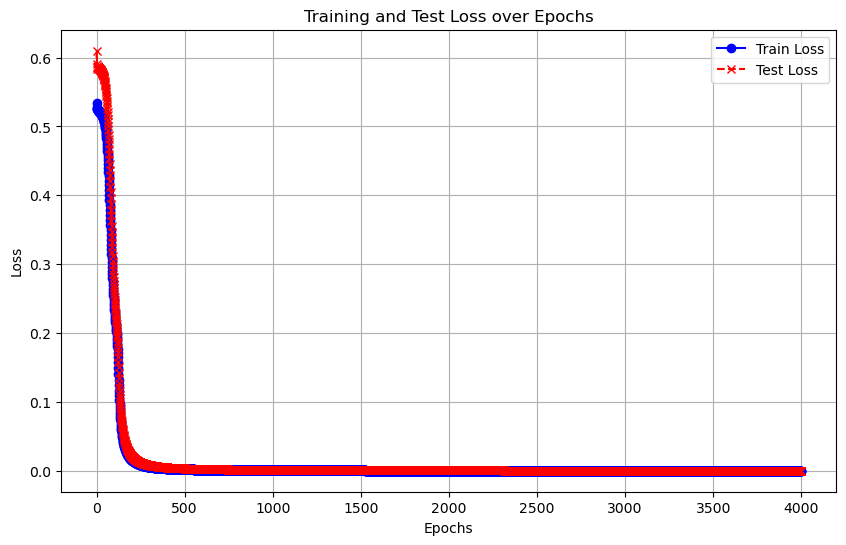

In [89]:
epochs = 4000
batchsize = 16
steps = X.size(0)
train_losses = []  # Store training loss at each epoch
test_losses = []   # Store test loss at each epoch

for i in range(epochs):
    for j in range(0,steps,batchsize):
#         data_points = np.random.randint(X.size(0), size=448)
        end = min(j+batchsize, X.size(0))
        x_var = Variable(X[j:end], requires_grad=False)
        y_var = Variable(Y[j:end], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var).squeeze()
#         print('y_hat=', y_hat, 'y_var=', y_var)
        train_loss = loss_func.forward(y_hat, y_var)
#         print(loss)
        train_loss.backward()
        optimizer.step()
        
#     if i % 500 == 0:
    y_hat_train = model(X)
    train_loss = loss_func.forward(y_hat_train, Y)
    train_losses.append(train_loss.detach().numpy())
    y_hat_test = model(X_test)
    test_loss = loss_func.forward(y_hat_test, Y_test)
    test_losses.append(test_loss.detach().numpy())
    print ("Epoch: {0}, Loss: {1}, ".format(i, test_loss.data.item()))
plotloss(epochs, train_losses, test_losses, 'sigmoid_training')

In [14]:
from matplotlib.ticker import MaxNLocator
def plot_contour(predict_fn, minx, maxx, miny, maxy, fig, ax):
    """Plot a contour given the provided prediction function"""
    print(minx, maxx)
    print(miny, maxy)
    x, y = np.meshgrid(np.linspace(minx, maxx, num=20), np.linspace(miny, maxy, num=20))
    z = np.zeros(x.shape)
    
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
#             print(predict_fn(np.array([[x[i, j], y[i, j]]])))
            z[i, j] = predict_fn(np.array([[x[i, j], y[i, j]]]))[0]

#     plt.contourf(x, y, z, levels=[-float('inf'), 0.1, 0.8, float('inf')], colors=['orange', 'cyan'])
#     locator=MaxNLocator(prune='both',nbins=5)
#     plt.set_major_locator(locator)  # Place major ticks at every multiple of 5
    contour = ax.contourf(x, y, z, levels=10, cmap='Pastel1', extend='both')
#     ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Example for y-axis
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Example for x-axis

    # Add colorbar and labels
    fig.colorbar(contour, ax=ax)

def plot_dataset (x, y, save_path):
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'rx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'bo', linewidth=2,  mfc='none')
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

    
def plot(x, y, predict_fn, save_path=None):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        save_path: Path to save the plot.
        correction: Correction factor to apply, if any.
    """
    # Plot dataset
#     plt.figure()
    
    # Create contour plot
    fig, ax = plt.subplots()
    
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)
    
    minx = min(x[:,-2])
    maxx = max(x[:,-2])
    miny = min(x[:,-1])
    maxy = max(x[:,-1])

    plot_contour(predict_fn, minx, maxx, miny, maxy, fig, ax)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)


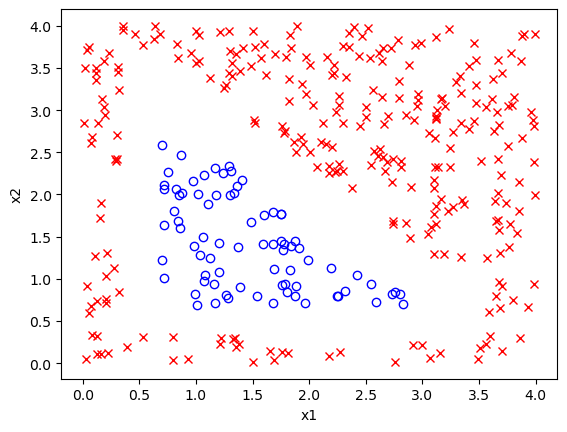

In [15]:
plot_dataset(X,Y, 'triangle_dataset')

In [20]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-6.2407,  0.1818],
        [-0.4544, -6.1779],
        [ 2.6229,  2.6729]], requires_grad=True), Parameter containing:
tensor([  2.5156,   3.5846, -10.8805], requires_grad=True), Parameter containing:
tensor([[ 4.1409,  4.6273,  5.1235],
        [ 2.4494,  1.6628,  2.7316],
        [-5.8589, -5.9260, -6.7633]], requires_grad=True), Parameter containing:
tensor([-2.3272, -1.1250,  3.1109], requires_grad=True), Parameter containing:
tensor([[  8.7372,   4.1911, -13.0320]], requires_grad=True), Parameter containing:
tensor([0.3015], requires_grad=True)]


In [22]:
step_predict = lambda data: model.lin1(torch.Tensor(data)).detach().numpy()
lin1 = step_predict(X_test)
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy()
lin1ac = step_predict(X_test)
for i in range(32):
    print(X[i], lin1[i], lin1ac[i])


tensor([1.7687, 1.3407]) [-10.540044  -13.03245     1.5635653] [2.6454871e-05 2.1881547e-06 8.2686430e-01]
tensor([3.9860, 2.8100]) [ -5.3523827 -10.9292965  -1.3829527] [4.7145193e-03 1.7924995e-05 2.0053519e-01]
tensor([1.8717, 1.4474]) [-20.72996  -15.31419    6.530032] [9.9332875e-10 2.2342499e-07 9.9854314e-01]
tensor([1.5922, 1.4102]) [-18.245483 -20.716125   7.964999] [1.1914813e-08 1.0071659e-09 9.9965274e-01]
tensor([1.3151, 3.4067]) [ 1.3241721  2.2035508 -9.805029 ] [7.8987497e-01 9.0056789e-01 5.5170392e-05]
tensor([1.8314, 3.8942]) [ 0.10526586  3.258982   -9.800832  ] [5.2629220e-01 9.6299458e-01 5.5402423e-05]
tensor([2.6514, 3.7404]) [-21.026964    -1.0206938    0.29797173] [7.3808348e-10 2.6489228e-01 5.7394660e-01]
tensor([0.0355, 3.7183]) [-21.395643  -13.772421    6.1036386] [5.1049348e-10 1.0440305e-06 9.9777031e-01]
tensor([1.5372, 0.7944]) [ 1.8272841 -3.1237512 -7.634528 ] [8.6143786e-01 4.2138107e-02 4.8323307e-04]
tensor([0.7194, 2.0647]) [-16.869324   -7.3094

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


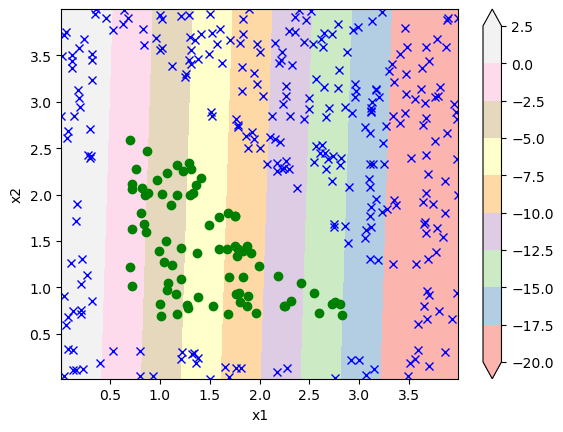

In [24]:
step_predict = lambda data: model.lin1(torch.Tensor(data)).detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict)

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


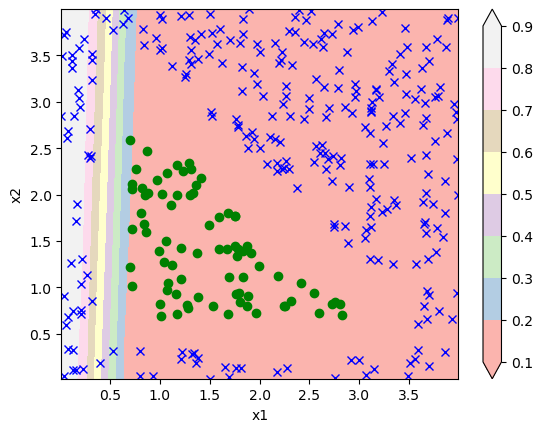

In [25]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h1.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


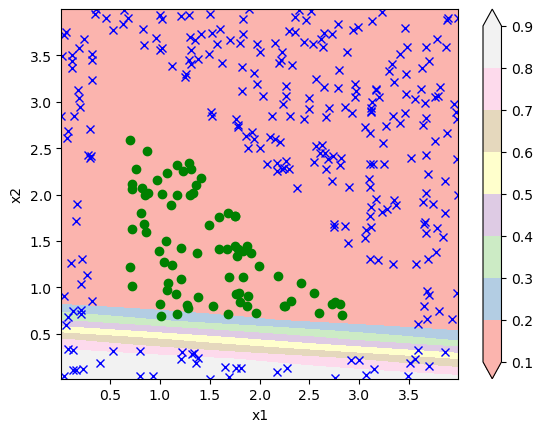

In [26]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[1]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h2.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


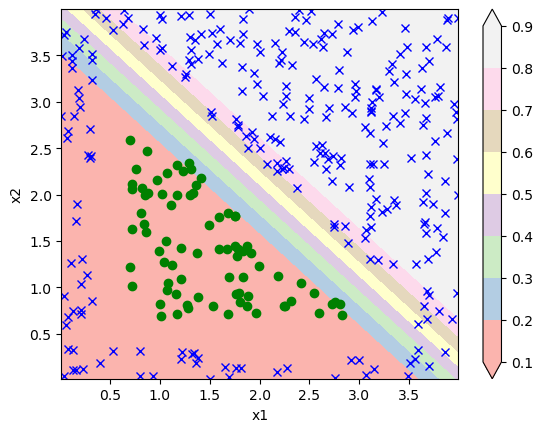

In [27]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[2]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h3.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


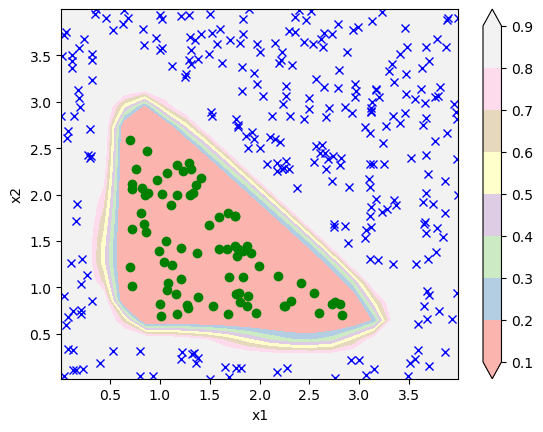

In [28]:
step_predict = lambda data: model(torch.Tensor(data)).detach().numpy()
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_o.pdf')

In [329]:
# Same as linear regression! 
from vector_quantize import VectorQuantize

num_codes = 16
num_codes1 = 8

class VQTriangle(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(VQTriangle, self).__init__()
        self.lin1 = nn.Linear(input_dim, 3)
        self.lin11 = nn.Linear(3, 3)
        self.lin2 = nn.Linear(3, output_dim)
        self.vq = VectorQuantize(dim=3, accept_image_fmap=False, codebook_size=num_codes,
    rotation_trick=True, straight_through=False, 
                                 learnable_codebook = True, 
                                 in_place_codebook_optimizer=optim.SGD,
                                 ema_update = False, 
                                 use_cosine_sim = False
                                )
        self.vq1 = VectorQuantize(dim=3, accept_image_fmap=False, codebook_size=num_codes1,
    rotation_trick=True, straight_through=False, 
                                 learnable_codebook = True, 
                                 in_place_codebook_optimizer=optim.SGD,
                                 ema_update = False, 
#                                  use_cosine_sim = True
                                )
        
    def lin1ac(self, x):
#         print('x', x)
        x = self.lin1(x)
#         x = torch.sigmoid(x*10)
        x, indices, commit_loss = self.vq(x)
        return x, indices, commit_loss
    
    def lin11ac(self, x):
#         print('x', x)
        x = self.lin11(x)
#         x = torch.sigmoid(x*10)
        x, indices, commit_loss = self.vq1(x)
        return x, indices, commit_loss
    
    def lin2ac(self, x):
        x = self.lin2(x)
#         print('yhat',x)
        x = torch.sigmoid(x)
        x = x.reshape(-1)
#         x = F.relu(x)
        return x
            
    def forward(self, x):
        x, indices, commit_loss = self.lin1ac(x)
#         commit_loss1 = 0
        x, indices1, commit_loss1 = self.lin11ac(x)
#         print(x)
#         print('h', x.size(), x)
        
        x = self.lin2ac(x)
        return x, indices, commit_loss, commit_loss1, indices1
    


In [330]:
def weights_copy_optimal(model1, model2):
    with torch.no_grad():
        model1.lin1.weight.copy_(model2.lin1.weight)
        model1.lin1.bias.copy_(model2.lin1.bias)
        model1.lin2.weight.copy_(model2.lin2.weight)
        model1.lin2.bias.copy_(model2.lin2.bias)

In [331]:
vqmodel = VQTriangle()
# weights_init_optimal(vqmodel)
weights_init(vqmodel)
# weights_copy_optimal(vqmodel, model)
optimizer = optim.SGD(vqmodel.parameters(), lr=0.02, momentum=0.9)
vqmodel.vq.in_place_codebook_optimizer = optim.SGD(vqmodel.vq._codebook.parameters(),lr=0.02, momentum=0.9) 
vqmodel.vq1.in_place_codebook_optimizer = optim.SGD(vqmodel.vq1._codebook.parameters(),lr=0.02, momentum=0.9) 

In [332]:
# vqmodel.vq._codebook.embed = torch.nn.Parameter(torch.Tensor([[[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1] ]]))
# vqmodel.vq.in_place_codebook_optimizer = optim.SGD(vqmodel.vq._codebook.parameters(),lr=0.02, momentum=0.9) 

In [333]:
# print((vqmodel.vq._codebook.embed))
# print((vqmodel.vq1._codebook.embed))
print(list(vqmodel.parameters()))


[Parameter containing:
tensor([[-0.6823,  0.3790],
        [ 0.2110, -0.3257],
        [-0.8549, -1.0503]], requires_grad=True), Parameter containing:
tensor([ 0.3638, -0.4329, -0.6371], requires_grad=True), Parameter containing:
tensor([[-0.7021,  0.3227,  0.6014],
        [-0.5428, -1.0077,  1.4759],
        [-2.2373,  1.0443,  0.3909]], requires_grad=True), Parameter containing:
tensor([ 0.3877, -0.4650, -0.2189], requires_grad=True), Parameter containing:
tensor([[-0.8843, -1.4459, -1.4809]], requires_grad=True), Parameter containing:
tensor([-0.1161], requires_grad=True), Parameter containing:
tensor([[[ 0.0969, -0.1837,  0.1678],
         [ 0.0434, -0.0872,  0.3340],
         [-0.3184,  0.3053,  0.2380],
         [-0.0544, -0.1100,  0.2830],
         [ 0.1414, -0.3140, -0.2732],
         [-0.3459, -0.1490, -0.0589],
         [ 0.1295,  0.2073, -0.3153],
         [ 0.1804,  0.1231,  0.1160],
         [-0.3245, -0.2365, -0.0424],
         [ 0.1712, -0.0839, -0.1104],
         [ 0.0

In [334]:
# x1 = torch.Tensor([[0.2,2]])
# pred, ind, comlos = vqmodel(x1)
# print(pred)
# for i in range(X.size(0)):
#     y_hat, indi, comlos = vqmodel(X[i:i+1])
#     loss = loss_func.forward(y_hat, Y[i:i+1])
#     print(loss)

In [335]:
# epochs = 8000
# alpha=5
# for i in range(epochs):
#     optimizer.zero_grad()
#     y_hat, indices, commit_loss = vqmodel(X)
#     loss = loss_func.forward(y_hat, Y)
#     (loss + alpha * commit_loss).backward()

#     optimizer.step()

# #     if i % 500 == 0:
#     print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))
#     print(list(vqmodel.parameters()))

In [336]:
alpha = 1
epochs = 4000
batchsize = 16
steps = X.size(0)
train_losses = []
test_losses = []
codebook_util = []
codebook_util1 = []
codebook_len = len(vqmodel.vq._codebook.embed.detach()[0])
codebook_len1 = len(vqmodel.vq1._codebook.embed.detach()[0])
for i in range(epochs):
    epoch_ind = set()
    epoch_ind1 = set()
    for j in range(0,steps,batchsize):
#         data_points = np.random.randint(X.size(0), size=448)
        end = min(j+batchsize, X.size(0))
        x_var = Variable(X[j:end], requires_grad=False)
        y_var = Variable(Y[j:end], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat, ind, commit_loss, com1, ind1 = vqmodel(x_var)
#         print('y_hat=', y_hat, 'y_var=', y_var)
        epoch_ind.update(ind.detach().numpy())
        epoch_ind1.update(ind1.detach().numpy())
        loss = loss_func.forward(y_hat.squeeze(), y_var)
#         print(loss)
        (loss + alpha * commit_loss + alpha* com1).backward()
        optimizer.step()
        
#     if i % 500 == 0:
    y_hat_train,_,_,_,_ = vqmodel(X)
    train_loss = loss_func.forward(y_hat_train, Y)
    train_losses.append(train_loss.detach().numpy())
    y_hat_test,_,_,_,_ = vqmodel(X_test)
    test_loss = loss_func.forward(y_hat_test, Y_test)
    test_losses.append(test_loss.detach().numpy())
    codebook_util.append(len(epoch_ind)/codebook_len)
    codebook_util1.append(len(epoch_ind1)/codebook_len1)
    print ("Epoch: {0}, Loss: {1}, CodeBookUse: {2}, {3}".format(i, test_loss.data.item(), len(epoch_ind), len(epoch_ind)/codebook_len))
plotloss(epochs, train_losses, test_losses, 'vq_rot_ema_16')
plot_codebook_util(epochs, codebook_util, 'vq_util_'+str(codebook_len))
plot_codebook_util(epochs, codebook_util1, 'vq_util_'+str(codebook_len1))

Epoch: 0, Loss: 0.5638411641120911, CodeBookUse: 14, 0.875
Epoch: 1, Loss: 0.9526746869087219, CodeBookUse: 11, 0.6875
Epoch: 2, Loss: 0.570879340171814, CodeBookUse: 10, 0.625
Epoch: 3, Loss: 0.5935239195823669, CodeBookUse: 9, 0.5625
Epoch: 4, Loss: 0.584865152835846, CodeBookUse: 6, 0.375
Epoch: 5, Loss: 0.5776252150535583, CodeBookUse: 6, 0.375
Epoch: 6, Loss: 0.5307563543319702, CodeBookUse: 5, 0.3125
Epoch: 7, Loss: 0.5583375096321106, CodeBookUse: 6, 0.375
Epoch: 8, Loss: 0.5509905219078064, CodeBookUse: 7, 0.4375
Epoch: 9, Loss: 0.5679822564125061, CodeBookUse: 9, 0.5625
Epoch: 10, Loss: 0.5475472211837769, CodeBookUse: 7, 0.4375
Epoch: 11, Loss: 0.4891442060470581, CodeBookUse: 9, 0.5625
Epoch: 12, Loss: 0.5153570771217346, CodeBookUse: 11, 0.6875
Epoch: 13, Loss: 0.5857120156288147, CodeBookUse: 9, 0.5625
Epoch: 14, Loss: 0.5939693450927734, CodeBookUse: 6, 0.375
Epoch: 15, Loss: 0.5883166193962097, CodeBookUse: 8, 0.5
Epoch: 16, Loss: 0.5638468265533447, CodeBookUse: 7, 0.43

Epoch: 141, Loss: 0.44248440861701965, CodeBookUse: 8, 0.5
Epoch: 142, Loss: 0.5336917638778687, CodeBookUse: 9, 0.5625
Epoch: 143, Loss: 0.5140134692192078, CodeBookUse: 9, 0.5625
Epoch: 144, Loss: 0.5472501516342163, CodeBookUse: 8, 0.5
Epoch: 145, Loss: 0.49752649664878845, CodeBookUse: 8, 0.5
Epoch: 146, Loss: 0.5509611964225769, CodeBookUse: 8, 0.5
Epoch: 147, Loss: 0.5517414808273315, CodeBookUse: 8, 0.5
Epoch: 148, Loss: 0.5641236901283264, CodeBookUse: 8, 0.5
Epoch: 149, Loss: 0.537659227848053, CodeBookUse: 8, 0.5
Epoch: 150, Loss: 0.4750318229198456, CodeBookUse: 8, 0.5
Epoch: 151, Loss: 0.5212829113006592, CodeBookUse: 9, 0.5625
Epoch: 152, Loss: 0.5992937088012695, CodeBookUse: 8, 0.5
Epoch: 153, Loss: 0.5643898248672485, CodeBookUse: 8, 0.5
Epoch: 154, Loss: 0.5420743227005005, CodeBookUse: 8, 0.5
Epoch: 155, Loss: 0.5651012659072876, CodeBookUse: 8, 0.5
Epoch: 156, Loss: 0.4845225512981415, CodeBookUse: 8, 0.5
Epoch: 157, Loss: 0.5101490616798401, CodeBookUse: 8, 0.5
Epoc

Epoch: 279, Loss: 0.49698692560195923, CodeBookUse: 9, 0.5625
Epoch: 280, Loss: 0.490293025970459, CodeBookUse: 9, 0.5625
Epoch: 281, Loss: 0.5039293766021729, CodeBookUse: 9, 0.5625
Epoch: 282, Loss: 0.5404872298240662, CodeBookUse: 9, 0.5625
Epoch: 283, Loss: 0.5395488739013672, CodeBookUse: 9, 0.5625
Epoch: 284, Loss: 0.5716864466667175, CodeBookUse: 9, 0.5625
Epoch: 285, Loss: 0.5169456601142883, CodeBookUse: 9, 0.5625
Epoch: 286, Loss: 0.567814826965332, CodeBookUse: 9, 0.5625
Epoch: 287, Loss: 0.533000648021698, CodeBookUse: 9, 0.5625
Epoch: 288, Loss: 0.4883899688720703, CodeBookUse: 9, 0.5625
Epoch: 289, Loss: 0.5041033029556274, CodeBookUse: 9, 0.5625
Epoch: 290, Loss: 0.5307466983795166, CodeBookUse: 9, 0.5625
Epoch: 291, Loss: 0.5524116158485413, CodeBookUse: 9, 0.5625
Epoch: 292, Loss: 0.5152809023857117, CodeBookUse: 9, 0.5625
Epoch: 293, Loss: 0.49658676981925964, CodeBookUse: 9, 0.5625
Epoch: 294, Loss: 0.46996188163757324, CodeBookUse: 9, 0.5625
Epoch: 295, Loss: 0.6437

Epoch: 417, Loss: 0.5085108876228333, CodeBookUse: 7, 0.4375
Epoch: 418, Loss: 0.5435736179351807, CodeBookUse: 7, 0.4375
Epoch: 419, Loss: 0.5401148200035095, CodeBookUse: 8, 0.5
Epoch: 420, Loss: 0.5601139664649963, CodeBookUse: 9, 0.5625
Epoch: 421, Loss: 0.5190291404724121, CodeBookUse: 6, 0.375
Epoch: 422, Loss: 0.47635790705680847, CodeBookUse: 7, 0.4375
Epoch: 423, Loss: 0.48852264881134033, CodeBookUse: 6, 0.375
Epoch: 424, Loss: 0.4739078879356384, CodeBookUse: 7, 0.4375
Epoch: 425, Loss: 0.4805770516395569, CodeBookUse: 7, 0.4375
Epoch: 426, Loss: 0.5493035912513733, CodeBookUse: 7, 0.4375
Epoch: 427, Loss: 0.627769947052002, CodeBookUse: 9, 0.5625
Epoch: 428, Loss: 0.5297120213508606, CodeBookUse: 9, 0.5625
Epoch: 429, Loss: 0.5173264145851135, CodeBookUse: 7, 0.4375
Epoch: 430, Loss: 0.521992564201355, CodeBookUse: 6, 0.375
Epoch: 431, Loss: 0.516281247138977, CodeBookUse: 6, 0.375
Epoch: 432, Loss: 0.5093348026275635, CodeBookUse: 8, 0.5
Epoch: 433, Loss: 0.531293034553527

Epoch: 555, Loss: 0.5015971064567566, CodeBookUse: 4, 0.25
Epoch: 556, Loss: 0.5224558115005493, CodeBookUse: 4, 0.25
Epoch: 557, Loss: 0.5161865949630737, CodeBookUse: 4, 0.25
Epoch: 558, Loss: 0.5183091759681702, CodeBookUse: 4, 0.25
Epoch: 559, Loss: 0.5005850195884705, CodeBookUse: 4, 0.25
Epoch: 560, Loss: 0.5034340620040894, CodeBookUse: 4, 0.25
Epoch: 561, Loss: 0.5191342830657959, CodeBookUse: 4, 0.25
Epoch: 562, Loss: 0.5016351938247681, CodeBookUse: 4, 0.25
Epoch: 563, Loss: 0.505334198474884, CodeBookUse: 4, 0.25
Epoch: 564, Loss: 0.4986352324485779, CodeBookUse: 9, 0.5625
Epoch: 565, Loss: 0.5074383020401001, CodeBookUse: 5, 0.3125
Epoch: 566, Loss: 0.4945758879184723, CodeBookUse: 5, 0.3125
Epoch: 567, Loss: 0.4989781975746155, CodeBookUse: 5, 0.3125
Epoch: 568, Loss: 0.5656426548957825, CodeBookUse: 5, 0.3125
Epoch: 569, Loss: 0.5362476706504822, CodeBookUse: 5, 0.3125
Epoch: 570, Loss: 0.5280065536499023, CodeBookUse: 5, 0.3125
Epoch: 571, Loss: 0.5326213836669922, CodeB

Epoch: 693, Loss: 0.5609727501869202, CodeBookUse: 7, 0.4375
Epoch: 694, Loss: 0.5356882810592651, CodeBookUse: 9, 0.5625
Epoch: 695, Loss: 0.49693357944488525, CodeBookUse: 9, 0.5625
Epoch: 696, Loss: 0.4841776192188263, CodeBookUse: 7, 0.4375
Epoch: 697, Loss: 0.4684588611125946, CodeBookUse: 7, 0.4375
Epoch: 698, Loss: 0.4335669279098511, CodeBookUse: 7, 0.4375
Epoch: 699, Loss: 0.4891122281551361, CodeBookUse: 7, 0.4375
Epoch: 700, Loss: 0.5261918902397156, CodeBookUse: 7, 0.4375
Epoch: 701, Loss: 0.5250523090362549, CodeBookUse: 7, 0.4375
Epoch: 702, Loss: 0.5153568983078003, CodeBookUse: 7, 0.4375
Epoch: 703, Loss: 0.5210932493209839, CodeBookUse: 7, 0.4375
Epoch: 704, Loss: 0.5142084956169128, CodeBookUse: 7, 0.4375
Epoch: 705, Loss: 0.5083730220794678, CodeBookUse: 7, 0.4375
Epoch: 706, Loss: 0.48723143339157104, CodeBookUse: 7, 0.4375
Epoch: 707, Loss: 0.5008531212806702, CodeBookUse: 7, 0.4375
Epoch: 708, Loss: 0.4827287495136261, CodeBookUse: 8, 0.5
Epoch: 709, Loss: 0.50892

Epoch: 831, Loss: 0.5199848413467407, CodeBookUse: 10, 0.625
Epoch: 832, Loss: 0.5225256681442261, CodeBookUse: 10, 0.625
Epoch: 833, Loss: 0.513092041015625, CodeBookUse: 9, 0.5625
Epoch: 834, Loss: 0.5986896753311157, CodeBookUse: 9, 0.5625
Epoch: 835, Loss: 0.5295025110244751, CodeBookUse: 9, 0.5625
Epoch: 836, Loss: 0.5318066477775574, CodeBookUse: 9, 0.5625
Epoch: 837, Loss: 0.48811763525009155, CodeBookUse: 11, 0.6875
Epoch: 838, Loss: 0.5192737579345703, CodeBookUse: 11, 0.6875
Epoch: 839, Loss: 0.5094806551933289, CodeBookUse: 11, 0.6875
Epoch: 840, Loss: 0.5460591912269592, CodeBookUse: 12, 0.75
Epoch: 841, Loss: 0.5094125866889954, CodeBookUse: 10, 0.625
Epoch: 842, Loss: 0.5213261246681213, CodeBookUse: 10, 0.625
Epoch: 843, Loss: 0.5371933579444885, CodeBookUse: 10, 0.625
Epoch: 844, Loss: 0.5276641249656677, CodeBookUse: 10, 0.625
Epoch: 845, Loss: 0.51442551612854, CodeBookUse: 10, 0.625
Epoch: 846, Loss: 0.4994369447231293, CodeBookUse: 12, 0.75
Epoch: 847, Loss: 0.51188

Epoch: 969, Loss: 0.4885563254356384, CodeBookUse: 12, 0.75
Epoch: 970, Loss: 0.49053922295570374, CodeBookUse: 12, 0.75
Epoch: 971, Loss: 0.5443872809410095, CodeBookUse: 12, 0.75
Epoch: 972, Loss: 0.5123637914657593, CodeBookUse: 12, 0.75
Epoch: 973, Loss: 0.5122637152671814, CodeBookUse: 12, 0.75
Epoch: 974, Loss: 0.5322895646095276, CodeBookUse: 12, 0.75
Epoch: 975, Loss: 0.5089274644851685, CodeBookUse: 12, 0.75
Epoch: 976, Loss: 0.4859788119792938, CodeBookUse: 12, 0.75
Epoch: 977, Loss: 0.48371192812919617, CodeBookUse: 12, 0.75
Epoch: 978, Loss: 0.5566901564598083, CodeBookUse: 12, 0.75
Epoch: 979, Loss: 0.5152192711830139, CodeBookUse: 12, 0.75
Epoch: 980, Loss: 0.5104537010192871, CodeBookUse: 12, 0.75
Epoch: 981, Loss: 0.490030974149704, CodeBookUse: 12, 0.75
Epoch: 982, Loss: 0.5107473134994507, CodeBookUse: 12, 0.75
Epoch: 983, Loss: 0.49826228618621826, CodeBookUse: 12, 0.75
Epoch: 984, Loss: 0.5078052878379822, CodeBookUse: 12, 0.75
Epoch: 985, Loss: 0.48172998428344727,

Epoch: 1104, Loss: 0.5187010169029236, CodeBookUse: 12, 0.75
Epoch: 1105, Loss: 0.5218864679336548, CodeBookUse: 12, 0.75
Epoch: 1106, Loss: 0.5204645991325378, CodeBookUse: 12, 0.75
Epoch: 1107, Loss: 0.51153564453125, CodeBookUse: 12, 0.75
Epoch: 1108, Loss: 0.5244854688644409, CodeBookUse: 12, 0.75
Epoch: 1109, Loss: 0.49086612462997437, CodeBookUse: 12, 0.75
Epoch: 1110, Loss: 0.4889490306377411, CodeBookUse: 12, 0.75
Epoch: 1111, Loss: 0.492834210395813, CodeBookUse: 12, 0.75
Epoch: 1112, Loss: 0.5230542421340942, CodeBookUse: 12, 0.75
Epoch: 1113, Loss: 0.5566602349281311, CodeBookUse: 12, 0.75
Epoch: 1114, Loss: 0.5177768468856812, CodeBookUse: 12, 0.75
Epoch: 1115, Loss: 0.5437162518501282, CodeBookUse: 12, 0.75
Epoch: 1116, Loss: 0.5432181358337402, CodeBookUse: 12, 0.75
Epoch: 1117, Loss: 0.5138636827468872, CodeBookUse: 12, 0.75
Epoch: 1118, Loss: 0.5434896945953369, CodeBookUse: 12, 0.75
Epoch: 1119, Loss: 0.5132459998130798, CodeBookUse: 12, 0.75
Epoch: 1120, Loss: 0.50349

Epoch: 1241, Loss: 0.536262571811676, CodeBookUse: 12, 0.75
Epoch: 1242, Loss: 0.5118364095687866, CodeBookUse: 12, 0.75
Epoch: 1243, Loss: 0.502182126045227, CodeBookUse: 12, 0.75
Epoch: 1244, Loss: 0.5046036839485168, CodeBookUse: 12, 0.75
Epoch: 1245, Loss: 0.5073661208152771, CodeBookUse: 12, 0.75
Epoch: 1246, Loss: 0.5094422698020935, CodeBookUse: 12, 0.75
Epoch: 1247, Loss: 0.5074816942214966, CodeBookUse: 12, 0.75
Epoch: 1248, Loss: 0.5076794624328613, CodeBookUse: 12, 0.75
Epoch: 1249, Loss: 0.504565417766571, CodeBookUse: 12, 0.75
Epoch: 1250, Loss: 0.5040900707244873, CodeBookUse: 12, 0.75
Epoch: 1251, Loss: 0.5066257119178772, CodeBookUse: 12, 0.75
Epoch: 1252, Loss: 0.5063716769218445, CodeBookUse: 12, 0.75
Epoch: 1253, Loss: 0.5073639750480652, CodeBookUse: 12, 0.75
Epoch: 1254, Loss: 0.511239230632782, CodeBookUse: 12, 0.75
Epoch: 1255, Loss: 0.5140838027000427, CodeBookUse: 12, 0.75
Epoch: 1256, Loss: 0.5099931359291077, CodeBookUse: 12, 0.75
Epoch: 1257, Loss: 0.5093396

Epoch: 1376, Loss: 0.5232001543045044, CodeBookUse: 11, 0.6875
Epoch: 1377, Loss: 0.5340322852134705, CodeBookUse: 12, 0.75
Epoch: 1378, Loss: 0.5432305932044983, CodeBookUse: 11, 0.6875
Epoch: 1379, Loss: 0.4993777871131897, CodeBookUse: 11, 0.6875
Epoch: 1380, Loss: 0.5173905491828918, CodeBookUse: 12, 0.75
Epoch: 1381, Loss: 0.5367903709411621, CodeBookUse: 12, 0.75
Epoch: 1382, Loss: 0.5166075825691223, CodeBookUse: 12, 0.75
Epoch: 1383, Loss: 0.5585907697677612, CodeBookUse: 12, 0.75
Epoch: 1384, Loss: 0.5338836908340454, CodeBookUse: 12, 0.75
Epoch: 1385, Loss: 0.5687265992164612, CodeBookUse: 12, 0.75
Epoch: 1386, Loss: 0.5338311791419983, CodeBookUse: 12, 0.75
Epoch: 1387, Loss: 0.5275959372520447, CodeBookUse: 12, 0.75
Epoch: 1388, Loss: 0.5088897347450256, CodeBookUse: 12, 0.75
Epoch: 1389, Loss: 0.5445317029953003, CodeBookUse: 12, 0.75
Epoch: 1390, Loss: 0.495069295167923, CodeBookUse: 12, 0.75
Epoch: 1391, Loss: 0.5152276158332825, CodeBookUse: 12, 0.75
Epoch: 1392, Loss: 

Epoch: 1511, Loss: 0.5252333879470825, CodeBookUse: 11, 0.6875
Epoch: 1512, Loss: 0.5310700535774231, CodeBookUse: 12, 0.75
Epoch: 1513, Loss: 0.5206274390220642, CodeBookUse: 12, 0.75
Epoch: 1514, Loss: 0.5162841081619263, CodeBookUse: 11, 0.6875
Epoch: 1515, Loss: 0.4868568480014801, CodeBookUse: 12, 0.75
Epoch: 1516, Loss: 0.5214524865150452, CodeBookUse: 11, 0.6875
Epoch: 1517, Loss: 0.5022411942481995, CodeBookUse: 11, 0.6875
Epoch: 1518, Loss: 0.575864851474762, CodeBookUse: 12, 0.75
Epoch: 1519, Loss: 0.45982080698013306, CodeBookUse: 12, 0.75
Epoch: 1520, Loss: 0.4923163652420044, CodeBookUse: 12, 0.75
Epoch: 1521, Loss: 0.5278061032295227, CodeBookUse: 12, 0.75
Epoch: 1522, Loss: 0.5464044213294983, CodeBookUse: 12, 0.75
Epoch: 1523, Loss: 0.5552952885627747, CodeBookUse: 12, 0.75
Epoch: 1524, Loss: 0.5039108991622925, CodeBookUse: 11, 0.6875
Epoch: 1525, Loss: 0.5452422499656677, CodeBookUse: 11, 0.6875
Epoch: 1526, Loss: 0.5462830662727356, CodeBookUse: 11, 0.6875
Epoch: 152

Epoch: 1645, Loss: 0.5123005509376526, CodeBookUse: 12, 0.75
Epoch: 1646, Loss: 0.51887047290802, CodeBookUse: 12, 0.75
Epoch: 1647, Loss: 0.48469042778015137, CodeBookUse: 12, 0.75
Epoch: 1648, Loss: 0.5130968689918518, CodeBookUse: 11, 0.6875
Epoch: 1649, Loss: 0.562782347202301, CodeBookUse: 11, 0.6875
Epoch: 1650, Loss: 0.5410619378089905, CodeBookUse: 12, 0.75
Epoch: 1651, Loss: 0.5398366451263428, CodeBookUse: 12, 0.75
Epoch: 1652, Loss: 0.559862494468689, CodeBookUse: 11, 0.6875
Epoch: 1653, Loss: 0.5628592371940613, CodeBookUse: 11, 0.6875
Epoch: 1654, Loss: 0.5821549892425537, CodeBookUse: 11, 0.6875
Epoch: 1655, Loss: 0.5325903296470642, CodeBookUse: 12, 0.75
Epoch: 1656, Loss: 0.5393608808517456, CodeBookUse: 12, 0.75
Epoch: 1657, Loss: 0.5450291633605957, CodeBookUse: 12, 0.75
Epoch: 1658, Loss: 0.4804455637931824, CodeBookUse: 12, 0.75
Epoch: 1659, Loss: 0.5075215697288513, CodeBookUse: 12, 0.75
Epoch: 1660, Loss: 0.525897741317749, CodeBookUse: 12, 0.75
Epoch: 1661, Loss:

Epoch: 1780, Loss: 0.5020171403884888, CodeBookUse: 12, 0.75
Epoch: 1781, Loss: 0.5077305436134338, CodeBookUse: 12, 0.75
Epoch: 1782, Loss: 0.49073663353919983, CodeBookUse: 12, 0.75
Epoch: 1783, Loss: 0.5071169137954712, CodeBookUse: 12, 0.75
Epoch: 1784, Loss: 0.5427877902984619, CodeBookUse: 12, 0.75
Epoch: 1785, Loss: 0.5181090235710144, CodeBookUse: 12, 0.75
Epoch: 1786, Loss: 0.4956042468547821, CodeBookUse: 12, 0.75
Epoch: 1787, Loss: 0.5021654963493347, CodeBookUse: 12, 0.75
Epoch: 1788, Loss: 0.504643440246582, CodeBookUse: 12, 0.75
Epoch: 1789, Loss: 0.5462391972541809, CodeBookUse: 11, 0.6875
Epoch: 1790, Loss: 0.5087301731109619, CodeBookUse: 12, 0.75
Epoch: 1791, Loss: 0.5918325185775757, CodeBookUse: 10, 0.625
Epoch: 1792, Loss: 0.5060895681381226, CodeBookUse: 8, 0.5
Epoch: 1793, Loss: 0.5204521417617798, CodeBookUse: 8, 0.5
Epoch: 1794, Loss: 0.4822268486022949, CodeBookUse: 9, 0.5625
Epoch: 1795, Loss: 0.5058237910270691, CodeBookUse: 8, 0.5
Epoch: 1796, Loss: 0.44261

Epoch: 1915, Loss: 0.4986543357372284, CodeBookUse: 12, 0.75
Epoch: 1916, Loss: 0.5004684925079346, CodeBookUse: 11, 0.6875
Epoch: 1917, Loss: 0.4819802939891815, CodeBookUse: 11, 0.6875
Epoch: 1918, Loss: 0.5599642395973206, CodeBookUse: 10, 0.625
Epoch: 1919, Loss: 0.5116114020347595, CodeBookUse: 10, 0.625
Epoch: 1920, Loss: 0.5028473734855652, CodeBookUse: 10, 0.625
Epoch: 1921, Loss: 0.5093933939933777, CodeBookUse: 11, 0.6875
Epoch: 1922, Loss: 0.5481839179992676, CodeBookUse: 11, 0.6875
Epoch: 1923, Loss: 0.4887848198413849, CodeBookUse: 11, 0.6875
Epoch: 1924, Loss: 0.5009675621986389, CodeBookUse: 12, 0.75
Epoch: 1925, Loss: 0.5158563256263733, CodeBookUse: 12, 0.75
Epoch: 1926, Loss: 0.5228658318519592, CodeBookUse: 12, 0.75
Epoch: 1927, Loss: 0.5073934197425842, CodeBookUse: 12, 0.75
Epoch: 1928, Loss: 0.5319427251815796, CodeBookUse: 12, 0.75
Epoch: 1929, Loss: 0.5225847363471985, CodeBookUse: 10, 0.625
Epoch: 1930, Loss: 0.5057507157325745, CodeBookUse: 11, 0.6875
Epoch: 1

Epoch: 2050, Loss: 0.4525478482246399, CodeBookUse: 11, 0.6875
Epoch: 2051, Loss: 0.5199763178825378, CodeBookUse: 10, 0.625
Epoch: 2052, Loss: 0.5272446870803833, CodeBookUse: 11, 0.6875
Epoch: 2053, Loss: 0.5359584093093872, CodeBookUse: 11, 0.6875
Epoch: 2054, Loss: 0.503510057926178, CodeBookUse: 11, 0.6875
Epoch: 2055, Loss: 0.5058503150939941, CodeBookUse: 11, 0.6875
Epoch: 2056, Loss: 0.5134389996528625, CodeBookUse: 11, 0.6875
Epoch: 2057, Loss: 0.5452466607093811, CodeBookUse: 10, 0.625
Epoch: 2058, Loss: 0.5494935512542725, CodeBookUse: 11, 0.6875
Epoch: 2059, Loss: 0.5060648322105408, CodeBookUse: 11, 0.6875
Epoch: 2060, Loss: 0.5018342137336731, CodeBookUse: 11, 0.6875
Epoch: 2061, Loss: 0.5148620009422302, CodeBookUse: 11, 0.6875
Epoch: 2062, Loss: 0.5128053426742554, CodeBookUse: 11, 0.6875
Epoch: 2063, Loss: 0.5244143009185791, CodeBookUse: 11, 0.6875
Epoch: 2064, Loss: 0.5223705172538757, CodeBookUse: 12, 0.75
Epoch: 2065, Loss: 0.5308737754821777, CodeBookUse: 12, 0.75

Epoch: 2184, Loss: 0.5513347387313843, CodeBookUse: 11, 0.6875
Epoch: 2185, Loss: 0.5342472195625305, CodeBookUse: 11, 0.6875
Epoch: 2186, Loss: 0.5089520812034607, CodeBookUse: 12, 0.75
Epoch: 2187, Loss: 0.5578758120536804, CodeBookUse: 11, 0.6875
Epoch: 2188, Loss: 0.49264225363731384, CodeBookUse: 11, 0.6875
Epoch: 2189, Loss: 0.5366490483283997, CodeBookUse: 11, 0.6875
Epoch: 2190, Loss: 0.5200901031494141, CodeBookUse: 11, 0.6875
Epoch: 2191, Loss: 0.5198495388031006, CodeBookUse: 11, 0.6875
Epoch: 2192, Loss: 0.4950498342514038, CodeBookUse: 11, 0.6875
Epoch: 2193, Loss: 0.5203290581703186, CodeBookUse: 11, 0.6875
Epoch: 2194, Loss: 0.5280031561851501, CodeBookUse: 12, 0.75
Epoch: 2195, Loss: 0.5320864915847778, CodeBookUse: 12, 0.75
Epoch: 2196, Loss: 0.5074148178100586, CodeBookUse: 11, 0.6875
Epoch: 2197, Loss: 0.4951281249523163, CodeBookUse: 11, 0.6875
Epoch: 2198, Loss: 0.4902627170085907, CodeBookUse: 11, 0.6875
Epoch: 2199, Loss: 0.5058300495147705, CodeBookUse: 11, 0.68

Epoch: 2316, Loss: 0.5024138689041138, CodeBookUse: 11, 0.6875
Epoch: 2317, Loss: 0.5083521604537964, CodeBookUse: 11, 0.6875
Epoch: 2318, Loss: 0.491050124168396, CodeBookUse: 11, 0.6875
Epoch: 2319, Loss: 0.4900011420249939, CodeBookUse: 11, 0.6875
Epoch: 2320, Loss: 0.4919606149196625, CodeBookUse: 11, 0.6875
Epoch: 2321, Loss: 0.5059738755226135, CodeBookUse: 11, 0.6875
Epoch: 2322, Loss: 0.5112410187721252, CodeBookUse: 11, 0.6875
Epoch: 2323, Loss: 0.5578850507736206, CodeBookUse: 11, 0.6875
Epoch: 2324, Loss: 0.5393375158309937, CodeBookUse: 11, 0.6875
Epoch: 2325, Loss: 0.5023228526115417, CodeBookUse: 11, 0.6875
Epoch: 2326, Loss: 0.4851628541946411, CodeBookUse: 11, 0.6875
Epoch: 2327, Loss: 0.49808719754219055, CodeBookUse: 11, 0.6875
Epoch: 2328, Loss: 0.48328813910484314, CodeBookUse: 11, 0.6875
Epoch: 2329, Loss: 0.5012641549110413, CodeBookUse: 11, 0.6875
Epoch: 2330, Loss: 0.4778479337692261, CodeBookUse: 11, 0.6875
Epoch: 2331, Loss: 0.5209607481956482, CodeBookUse: 11

Epoch: 2447, Loss: 0.49188148975372314, CodeBookUse: 10, 0.625
Epoch: 2448, Loss: 0.5364266633987427, CodeBookUse: 10, 0.625
Epoch: 2449, Loss: 0.49193093180656433, CodeBookUse: 9, 0.5625
Epoch: 2450, Loss: 0.5282672643661499, CodeBookUse: 9, 0.5625
Epoch: 2451, Loss: 0.5027967095375061, CodeBookUse: 9, 0.5625
Epoch: 2452, Loss: 0.4975912272930145, CodeBookUse: 9, 0.5625
Epoch: 2453, Loss: 0.5227164626121521, CodeBookUse: 11, 0.6875
Epoch: 2454, Loss: 0.5320529341697693, CodeBookUse: 10, 0.625
Epoch: 2455, Loss: 0.5101747512817383, CodeBookUse: 10, 0.625
Epoch: 2456, Loss: 0.47071677446365356, CodeBookUse: 11, 0.6875
Epoch: 2457, Loss: 0.5505085587501526, CodeBookUse: 9, 0.5625
Epoch: 2458, Loss: 0.510310173034668, CodeBookUse: 9, 0.5625
Epoch: 2459, Loss: 0.5748360753059387, CodeBookUse: 10, 0.625
Epoch: 2460, Loss: 0.5094764232635498, CodeBookUse: 10, 0.625
Epoch: 2461, Loss: 0.5485774278640747, CodeBookUse: 9, 0.5625
Epoch: 2462, Loss: 0.4948481321334839, CodeBookUse: 10, 0.625
Epoc

Epoch: 2580, Loss: 0.5045427680015564, CodeBookUse: 10, 0.625
Epoch: 2581, Loss: 0.5109579563140869, CodeBookUse: 10, 0.625
Epoch: 2582, Loss: 0.5424108505249023, CodeBookUse: 10, 0.625
Epoch: 2583, Loss: 0.5279268622398376, CodeBookUse: 10, 0.625
Epoch: 2584, Loss: 0.5166618227958679, CodeBookUse: 10, 0.625
Epoch: 2585, Loss: 0.49554285407066345, CodeBookUse: 10, 0.625
Epoch: 2586, Loss: 0.5139368772506714, CodeBookUse: 10, 0.625
Epoch: 2587, Loss: 0.49305301904678345, CodeBookUse: 10, 0.625
Epoch: 2588, Loss: 0.49179622530937195, CodeBookUse: 10, 0.625
Epoch: 2589, Loss: 0.4986395239830017, CodeBookUse: 10, 0.625
Epoch: 2590, Loss: 0.5062425136566162, CodeBookUse: 10, 0.625
Epoch: 2591, Loss: 0.4969257414340973, CodeBookUse: 10, 0.625
Epoch: 2592, Loss: 0.48943087458610535, CodeBookUse: 10, 0.625
Epoch: 2593, Loss: 0.5257630348205566, CodeBookUse: 10, 0.625
Epoch: 2594, Loss: 0.5152550339698792, CodeBookUse: 10, 0.625
Epoch: 2595, Loss: 0.5111624598503113, CodeBookUse: 10, 0.625
Epoc

Epoch: 2715, Loss: 0.5215577483177185, CodeBookUse: 6, 0.375
Epoch: 2716, Loss: 0.5218637585639954, CodeBookUse: 5, 0.3125
Epoch: 2717, Loss: 0.5060706734657288, CodeBookUse: 5, 0.3125
Epoch: 2718, Loss: 0.532671332359314, CodeBookUse: 5, 0.3125
Epoch: 2719, Loss: 0.5265836715698242, CodeBookUse: 6, 0.375
Epoch: 2720, Loss: 0.5979070663452148, CodeBookUse: 5, 0.3125
Epoch: 2721, Loss: 0.5251245498657227, CodeBookUse: 5, 0.3125
Epoch: 2722, Loss: 0.49426040053367615, CodeBookUse: 6, 0.375
Epoch: 2723, Loss: 0.5131251215934753, CodeBookUse: 6, 0.375
Epoch: 2724, Loss: 0.5311295986175537, CodeBookUse: 6, 0.375
Epoch: 2725, Loss: 0.5656891465187073, CodeBookUse: 6, 0.375
Epoch: 2726, Loss: 0.5099629163742065, CodeBookUse: 6, 0.375
Epoch: 2727, Loss: 0.5196450352668762, CodeBookUse: 6, 0.375
Epoch: 2728, Loss: 0.547064483165741, CodeBookUse: 6, 0.375
Epoch: 2729, Loss: 0.46842363476753235, CodeBookUse: 6, 0.375
Epoch: 2730, Loss: 0.5767351984977722, CodeBookUse: 6, 0.375
Epoch: 2731, Loss: 

Epoch: 2850, Loss: 0.4579532742500305, CodeBookUse: 6, 0.375
Epoch: 2851, Loss: 0.4620949625968933, CodeBookUse: 6, 0.375
Epoch: 2852, Loss: 0.47021201252937317, CodeBookUse: 6, 0.375
Epoch: 2853, Loss: 0.4708798825740814, CodeBookUse: 6, 0.375
Epoch: 2854, Loss: 0.4726851284503937, CodeBookUse: 6, 0.375
Epoch: 2855, Loss: 0.5641631484031677, CodeBookUse: 6, 0.375
Epoch: 2856, Loss: 0.4661508798599243, CodeBookUse: 6, 0.375
Epoch: 2857, Loss: 0.48445799946784973, CodeBookUse: 6, 0.375
Epoch: 2858, Loss: 0.49723905324935913, CodeBookUse: 6, 0.375
Epoch: 2859, Loss: 0.45198854804039, CodeBookUse: 6, 0.375
Epoch: 2860, Loss: 0.4626825451850891, CodeBookUse: 6, 0.375
Epoch: 2861, Loss: 0.49074113368988037, CodeBookUse: 6, 0.375
Epoch: 2862, Loss: 0.4751453399658203, CodeBookUse: 6, 0.375
Epoch: 2863, Loss: 0.5206243991851807, CodeBookUse: 6, 0.375
Epoch: 2864, Loss: 0.47078976035118103, CodeBookUse: 6, 0.375
Epoch: 2865, Loss: 0.5003961324691772, CodeBookUse: 6, 0.375
Epoch: 2866, Loss: 0.

Epoch: 2986, Loss: 0.5176728963851929, CodeBookUse: 7, 0.4375
Epoch: 2987, Loss: 0.4536083936691284, CodeBookUse: 7, 0.4375
Epoch: 2988, Loss: 0.594744861125946, CodeBookUse: 7, 0.4375
Epoch: 2989, Loss: 0.5564663410186768, CodeBookUse: 7, 0.4375
Epoch: 2990, Loss: 0.599216103553772, CodeBookUse: 7, 0.4375
Epoch: 2991, Loss: 0.5185914039611816, CodeBookUse: 7, 0.4375
Epoch: 2992, Loss: 0.47688883543014526, CodeBookUse: 7, 0.4375
Epoch: 2993, Loss: 0.4813846945762634, CodeBookUse: 7, 0.4375
Epoch: 2994, Loss: 0.6376431584358215, CodeBookUse: 5, 0.3125
Epoch: 2995, Loss: 0.6368008852005005, CodeBookUse: 6, 0.375
Epoch: 2996, Loss: 0.5909866690635681, CodeBookUse: 6, 0.375
Epoch: 2997, Loss: 0.5131970047950745, CodeBookUse: 6, 0.375
Epoch: 2998, Loss: 0.536948025226593, CodeBookUse: 7, 0.4375
Epoch: 2999, Loss: 0.5026201009750366, CodeBookUse: 7, 0.4375
Epoch: 3000, Loss: 0.5330991744995117, CodeBookUse: 8, 0.5
Epoch: 3001, Loss: 0.4656248688697815, CodeBookUse: 7, 0.4375
Epoch: 3002, Los

Epoch: 3120, Loss: 0.52098548412323, CodeBookUse: 7, 0.4375
Epoch: 3121, Loss: 0.49161913990974426, CodeBookUse: 7, 0.4375
Epoch: 3122, Loss: 0.5348313450813293, CodeBookUse: 7, 0.4375
Epoch: 3123, Loss: 0.4742129147052765, CodeBookUse: 7, 0.4375
Epoch: 3124, Loss: 0.5440962314605713, CodeBookUse: 7, 0.4375
Epoch: 3125, Loss: 0.47295087575912476, CodeBookUse: 7, 0.4375
Epoch: 3126, Loss: 0.48775413632392883, CodeBookUse: 7, 0.4375
Epoch: 3127, Loss: 0.4788014590740204, CodeBookUse: 7, 0.4375
Epoch: 3128, Loss: 0.4800169765949249, CodeBookUse: 7, 0.4375
Epoch: 3129, Loss: 0.4745769500732422, CodeBookUse: 7, 0.4375
Epoch: 3130, Loss: 0.5039917230606079, CodeBookUse: 7, 0.4375
Epoch: 3131, Loss: 0.4836611747741699, CodeBookUse: 7, 0.4375
Epoch: 3132, Loss: 0.49912190437316895, CodeBookUse: 7, 0.4375
Epoch: 3133, Loss: 0.4725445508956909, CodeBookUse: 7, 0.4375
Epoch: 3134, Loss: 0.5100861191749573, CodeBookUse: 7, 0.4375
Epoch: 3135, Loss: 0.4643177092075348, CodeBookUse: 7, 0.4375
Epoch:

Epoch: 3253, Loss: 0.523749828338623, CodeBookUse: 6, 0.375
Epoch: 3254, Loss: 0.5897679924964905, CodeBookUse: 7, 0.4375
Epoch: 3255, Loss: 0.6578870415687561, CodeBookUse: 6, 0.375
Epoch: 3256, Loss: 0.5662469267845154, CodeBookUse: 6, 0.375
Epoch: 3257, Loss: 0.5324872136116028, CodeBookUse: 6, 0.375
Epoch: 3258, Loss: 0.521950900554657, CodeBookUse: 6, 0.375
Epoch: 3259, Loss: 0.521087110042572, CodeBookUse: 6, 0.375
Epoch: 3260, Loss: 0.5007256865501404, CodeBookUse: 6, 0.375
Epoch: 3261, Loss: 0.494526743888855, CodeBookUse: 6, 0.375
Epoch: 3262, Loss: 0.493782639503479, CodeBookUse: 6, 0.375
Epoch: 3263, Loss: 0.5179373621940613, CodeBookUse: 6, 0.375
Epoch: 3264, Loss: 0.5042228102684021, CodeBookUse: 6, 0.375
Epoch: 3265, Loss: 0.5066845417022705, CodeBookUse: 6, 0.375
Epoch: 3266, Loss: 0.4949517846107483, CodeBookUse: 6, 0.375
Epoch: 3267, Loss: 0.518733561038971, CodeBookUse: 6, 0.375
Epoch: 3268, Loss: 0.4995098412036896, CodeBookUse: 6, 0.375
Epoch: 3269, Loss: 0.52271622

Epoch: 3390, Loss: 0.47672706842422485, CodeBookUse: 6, 0.375
Epoch: 3391, Loss: 0.5357761979103088, CodeBookUse: 6, 0.375
Epoch: 3392, Loss: 0.5014455318450928, CodeBookUse: 6, 0.375
Epoch: 3393, Loss: 0.505688488483429, CodeBookUse: 6, 0.375
Epoch: 3394, Loss: 0.5201732516288757, CodeBookUse: 6, 0.375
Epoch: 3395, Loss: 0.4894457161426544, CodeBookUse: 6, 0.375
Epoch: 3396, Loss: 0.4926943778991699, CodeBookUse: 6, 0.375
Epoch: 3397, Loss: 0.48769351840019226, CodeBookUse: 6, 0.375
Epoch: 3398, Loss: 0.4775039553642273, CodeBookUse: 6, 0.375
Epoch: 3399, Loss: 0.47539791464805603, CodeBookUse: 6, 0.375
Epoch: 3400, Loss: 0.5640420317649841, CodeBookUse: 6, 0.375
Epoch: 3401, Loss: 0.46685391664505005, CodeBookUse: 6, 0.375
Epoch: 3402, Loss: 0.45647865533828735, CodeBookUse: 6, 0.375
Epoch: 3403, Loss: 0.449323445558548, CodeBookUse: 6, 0.375
Epoch: 3404, Loss: 0.3729263246059418, CodeBookUse: 6, 0.375
Epoch: 3405, Loss: 0.4571964144706726, CodeBookUse: 7, 0.4375
Epoch: 3406, Loss: 0

Epoch: 3525, Loss: 0.5376183390617371, CodeBookUse: 6, 0.375
Epoch: 3526, Loss: 0.5272018313407898, CodeBookUse: 6, 0.375
Epoch: 3527, Loss: 0.521479606628418, CodeBookUse: 6, 0.375
Epoch: 3528, Loss: 0.5219190120697021, CodeBookUse: 6, 0.375
Epoch: 3529, Loss: 0.511532187461853, CodeBookUse: 6, 0.375
Epoch: 3530, Loss: 0.5193759799003601, CodeBookUse: 6, 0.375
Epoch: 3531, Loss: 0.5101691484451294, CodeBookUse: 6, 0.375
Epoch: 3532, Loss: 0.5134381055831909, CodeBookUse: 6, 0.375
Epoch: 3533, Loss: 0.5216178297996521, CodeBookUse: 6, 0.375
Epoch: 3534, Loss: 0.5181138515472412, CodeBookUse: 6, 0.375
Epoch: 3535, Loss: 0.5199945569038391, CodeBookUse: 6, 0.375
Epoch: 3536, Loss: 0.5245042443275452, CodeBookUse: 6, 0.375
Epoch: 3537, Loss: 0.5102936029434204, CodeBookUse: 6, 0.375
Epoch: 3538, Loss: 0.5173203945159912, CodeBookUse: 6, 0.375
Epoch: 3539, Loss: 0.5214725136756897, CodeBookUse: 6, 0.375
Epoch: 3540, Loss: 0.5058352947235107, CodeBookUse: 6, 0.375
Epoch: 3541, Loss: 0.52909

Epoch: 3660, Loss: 0.5108755826950073, CodeBookUse: 7, 0.4375
Epoch: 3661, Loss: 0.5133669972419739, CodeBookUse: 7, 0.4375
Epoch: 3662, Loss: 0.5228338241577148, CodeBookUse: 7, 0.4375
Epoch: 3663, Loss: 0.530591607093811, CodeBookUse: 7, 0.4375
Epoch: 3664, Loss: 0.5269685387611389, CodeBookUse: 7, 0.4375
Epoch: 3665, Loss: 0.519065260887146, CodeBookUse: 7, 0.4375
Epoch: 3666, Loss: 0.5284639000892639, CodeBookUse: 7, 0.4375
Epoch: 3667, Loss: 0.5168888568878174, CodeBookUse: 7, 0.4375
Epoch: 3668, Loss: 0.523090124130249, CodeBookUse: 7, 0.4375
Epoch: 3669, Loss: 0.5460126996040344, CodeBookUse: 7, 0.4375
Epoch: 3670, Loss: 0.5244869589805603, CodeBookUse: 7, 0.4375
Epoch: 3671, Loss: 0.5261666178703308, CodeBookUse: 7, 0.4375
Epoch: 3672, Loss: 0.5293381810188293, CodeBookUse: 7, 0.4375
Epoch: 3673, Loss: 0.5249820947647095, CodeBookUse: 7, 0.4375
Epoch: 3674, Loss: 0.5288010239601135, CodeBookUse: 7, 0.4375
Epoch: 3675, Loss: 0.5194270014762878, CodeBookUse: 7, 0.4375
Epoch: 3676

Epoch: 3795, Loss: 0.572736382484436, CodeBookUse: 7, 0.4375
Epoch: 3796, Loss: 0.5231720209121704, CodeBookUse: 7, 0.4375
Epoch: 3797, Loss: 0.5298357009887695, CodeBookUse: 7, 0.4375
Epoch: 3798, Loss: 0.5188025832176208, CodeBookUse: 7, 0.4375
Epoch: 3799, Loss: 0.5228122472763062, CodeBookUse: 7, 0.4375
Epoch: 3800, Loss: 0.5021744966506958, CodeBookUse: 7, 0.4375
Epoch: 3801, Loss: 0.5202032923698425, CodeBookUse: 7, 0.4375
Epoch: 3802, Loss: 0.4780604839324951, CodeBookUse: 7, 0.4375
Epoch: 3803, Loss: 0.482305645942688, CodeBookUse: 7, 0.4375
Epoch: 3804, Loss: 0.4957508444786072, CodeBookUse: 7, 0.4375
Epoch: 3805, Loss: 0.5408379435539246, CodeBookUse: 7, 0.4375
Epoch: 3806, Loss: 0.489193856716156, CodeBookUse: 7, 0.4375
Epoch: 3807, Loss: 0.5250727534294128, CodeBookUse: 7, 0.4375
Epoch: 3808, Loss: 0.46314501762390137, CodeBookUse: 7, 0.4375
Epoch: 3809, Loss: 0.49737560749053955, CodeBookUse: 7, 0.4375
Epoch: 3810, Loss: 0.5370121002197266, CodeBookUse: 7, 0.4375
Epoch: 38

Epoch: 3929, Loss: 0.6207767128944397, CodeBookUse: 7, 0.4375
Epoch: 3930, Loss: 0.48972389101982117, CodeBookUse: 7, 0.4375
Epoch: 3931, Loss: 0.6476813554763794, CodeBookUse: 7, 0.4375
Epoch: 3932, Loss: 0.4971637427806854, CodeBookUse: 7, 0.4375
Epoch: 3933, Loss: 0.5392854809761047, CodeBookUse: 7, 0.4375
Epoch: 3934, Loss: 0.4987860321998596, CodeBookUse: 7, 0.4375
Epoch: 3935, Loss: 0.5262925624847412, CodeBookUse: 7, 0.4375
Epoch: 3936, Loss: 0.47609180212020874, CodeBookUse: 7, 0.4375
Epoch: 3937, Loss: 0.5268306136131287, CodeBookUse: 7, 0.4375
Epoch: 3938, Loss: 0.4990764558315277, CodeBookUse: 7, 0.4375
Epoch: 3939, Loss: 0.5373169779777527, CodeBookUse: 7, 0.4375
Epoch: 3940, Loss: 0.4707873463630676, CodeBookUse: 7, 0.4375
Epoch: 3941, Loss: 0.5162018537521362, CodeBookUse: 7, 0.4375
Epoch: 3942, Loss: 0.5065769553184509, CodeBookUse: 7, 0.4375
Epoch: 3943, Loss: 0.5340533256530762, CodeBookUse: 7, 0.4375
Epoch: 3944, Loss: 0.5333560705184937, CodeBookUse: 7, 0.4375
Epoch:

NameError: name 'plotloss' is not defined

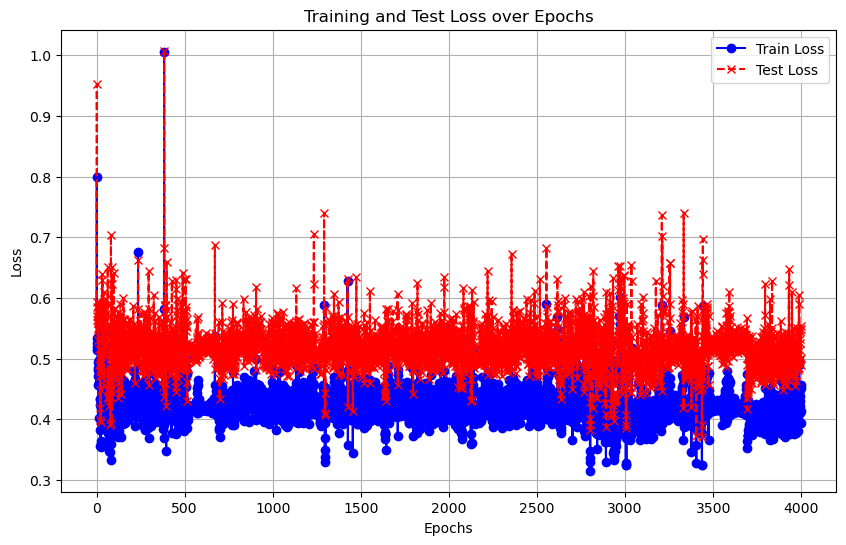

In [343]:
plotloss(epochs, train_losses, test_losses, 'vq_16_8')


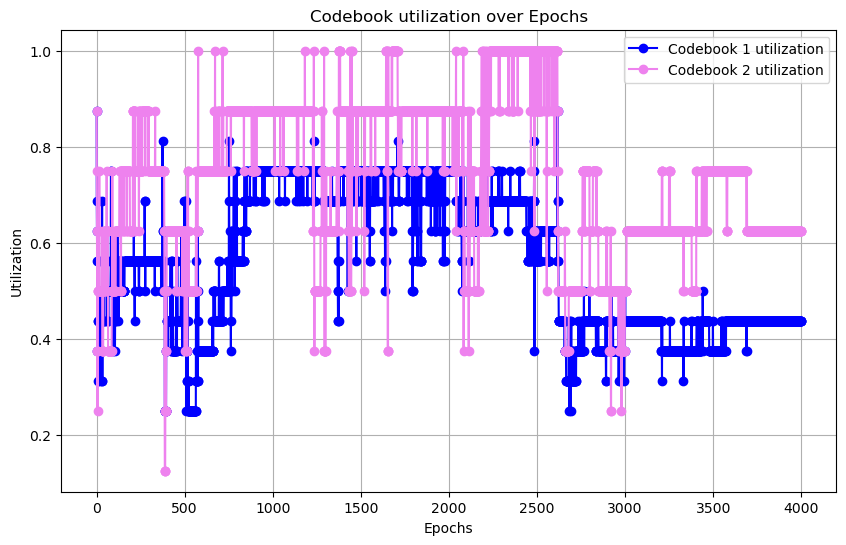

In [345]:
plot_codebook_util(epochs, codebook_util, codebook_util1, 'vq_util_16_8')

In [ ]:
codebook8util = codebook_util


In [319]:
x1 = torch.Tensor([[0.2,0.2]])
pred, ind, comlos = vqmodel(x1)
print(pred)

tensor([[ 0.2759, -0.8524, -0.1367]], grad_fn=<ViewBackward0>)


ValueError: too many values to unpack (expected 3)

In [112]:
print((vqmodel.vq._codebook.embed))
# print((vqmodel.vq1._codebook.embed))

print(list(vqmodel.parameters()))



tensor([[[ 2.8026e-40,  2.8026e-40, -2.8026e-40],
         [-2.8026e-40, -2.8026e-40, -2.8026e-40],
         [-2.8026e-40, -2.8026e-40,  2.8026e-40],
         [-5.0589e+00, -8.1608e+00,  1.1256e+01],
         [-2.8026e-40, -2.8026e-40,  2.8026e-40],
         [-5.5166e+00, -8.2443e+00,  1.1100e+01],
         [ 2.8026e-40,  2.8026e-40, -2.8026e-40],
         [ 2.8026e-40,  2.8026e-40,  2.8026e-40]]])
[Parameter containing:
tensor([[0.1458, 0.1738],
        [0.0281, 0.0305],
        [0.0468, 0.0612]], requires_grad=True), Parameter containing:
tensor([-5.9687, -8.3272, 10.9477], requires_grad=True), Parameter containing:
tensor([[ 0.4082,  1.5641,  0.4898],
        [-0.4289, -0.2574,  0.4886],
        [-1.5817, -0.0679, -0.9406]], requires_grad=True), Parameter containing:
tensor([-0.2220,  0.5552, -0.5655], requires_grad=True), Parameter containing:
tensor([[3.7112, 0.6562, 1.2973]], requires_grad=True), Parameter containing:
tensor([11.9272], requires_grad=True)]


tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


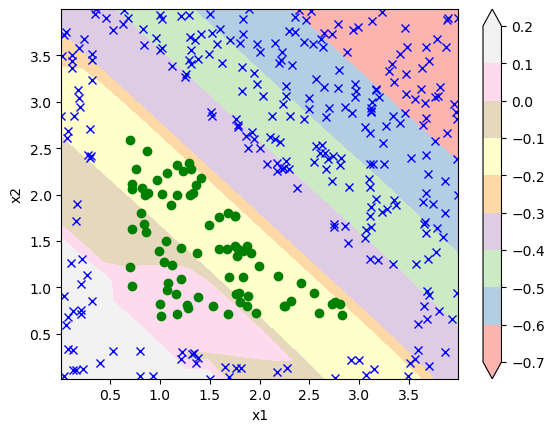

In [337]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_h1.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


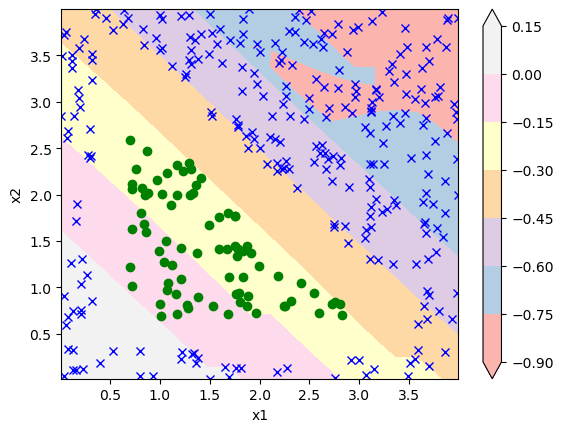

In [338]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[1]
step_y_pred = step_predict(X)
plot(X, Y, step_predict,'vq_h2.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


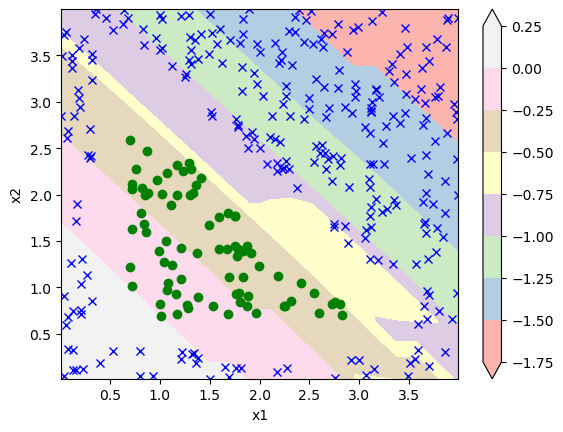

In [339]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[2]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_h3.pdf')


tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


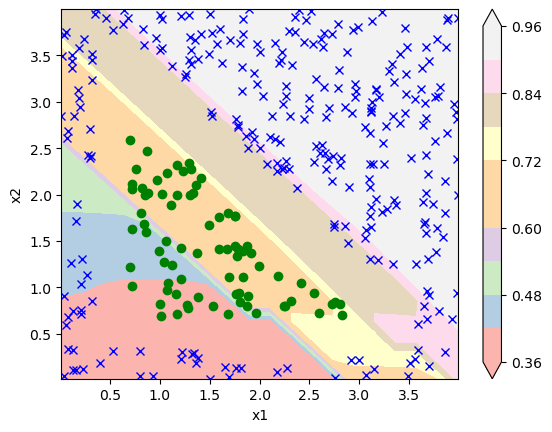

In [340]:
step_predict = lambda data: vqmodel(torch.Tensor(data))[0].detach().numpy()
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_o.pdf')